<a href="https://colab.research.google.com/github/RahafAlshahrany/Capstone_Project/blob/main/capston2/Churn_Prediction_Student_Notebook_V3_05_12_2023_LAST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Employee Churn Analysis Project***". This is the second project of Capstone Project Series, which you will be able to build your own classification models for a variety of business settings.

Also you will research what is Employee Churn?, How it is different from customer churn, Exploratory data analysis and visualization of employee churn dataset using ***matplotlib*** and ***seaborn***, model building and evaluation using python ***scikit-learn*** and ***Tensorflow-Keras*** packages.

You will be able to implement classification techniques in Python. Using Scikit-Learn allowing you to successfully make predictions with Distance Based, Bagging, Boosting algorithms for this project. On the other hand, for Deep Learning you will use Tensorflow-Keras.

At the end of the project, you will have the opportunity to deploy your model using *Streamlit*.

Before diving into the project, please take a look at the determines and project structure.

- NOTE: This project assumes that you already know the basics of coding in Python and are familiar with model deployement as well as the theory behind Distance Based, Bagging, Boosting algorithms, and Confusion Matrices. You can try more models and methods beside these to improve your model metrics.



# #Determines
In this project you have HR data of a company. A study is requested from you to predict which employee will churn by using this data.

The HR dataset has 14,999 samples. In the given dataset, you have two types of employee one who stayed and another who left the company.

You can describe 10 attributes in detail as:
- ***satisfaction_level:*** It is employee satisfaction point, which ranges from 0-1.
- ***last_evaluation:*** It is evaluated performance by the employer, which also ranges from 0-1.
- ***number_projects:*** How many of projects assigned to an employee?
- ***average_monthly_hours:*** How many hours in averega an employee worked in a month?
- **time_spent_company:** time_spent_company means employee experience. The number of years spent by an employee in the company.
- ***work_accident:*** Whether an employee has had a work accident or not.
- ***promotion_last_5years:*** Whether an employee has had a promotion in the last 5 years or not.
- ***Departments:*** Employee's working department/division.
- ***Salary:*** Salary level of the employee such as low, medium and high.
- ***left:*** Whether the employee has left the company or not.

First of all, to observe the structure of the data, outliers, missing values and features that affect the target variable, you must use exploratory data analysis and data visualization techniques.

Then, you must perform data pre-processing operations such as ***Scaling*** and ***Encoding*** to increase the accuracy score of Gradient Descent Based or Distance-Based algorithms.

You are asked to perform ***Cluster Analysis*** based on the information you obtain during exploratory data analysis and data visualization processes. The purpose of clustering analysis is to cluster data with similar characteristics.

Once the data is ready to be applied to the model, you must ***split the data into train and test***. Then build a model to predict whether employees will churn or not. Train your models with your train set, test the success of your model with your test set.

Try to make your predictions by using the *** Classification Algorithms***. You can use the related modules of the ***scikit-learn*** and ***Tensorflow-Keras*** library. You can use scikit-learn ***Classification Metrics*** module for accuracy calculation.

In the final step, you will deploy your model using Streamlit tool.



# #Tasks

#### 1. Exploratory Data Analysis
- EDA is an initial process of analysis, in which you can summarize characteristics of data such as pattern, trends, outliers, and hypothesis testing using descriptive statistics and visualization.
- In the given dataset, you have two types of employee one who stayed and another who left the company. So, you can divide data into two groups and compare their characteristics.

#### 2. Data Visualization
- Explore your data via visualizations to find-out:
 - What can be the reason of the churn?
 - Behavioral analysis of churns and not churns ..... etc.

#### 3. Cluster Analysis
- Apply ***clustering algorithms*** and writedown your conclusions about the clusters you created.

#### 5. Predictive Model Building
- Split Data as Train and Test set
- Built Classification Models(at least four models) and Evaluate Model Performances

#### 6. Model Deployement

- Save and Export the Best Model
- Deploy best model via Streamlit

## #Importing Modules and Predefined Functions#

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import warnings
warnings.filterwarnings('ignore')

# Set a Seaborn style for the plot
sns.set(style="whitegrid")

In [3]:
Rahaf = 'HR_Dataset.csv'
Husam = '/content/drive/MyDrive/Colab Notebooks/Datasets/HR_Dataset.csv'
Afnan = '/content/drive/MyDrive/Capstone_Projects/Project_two/HR_Dataset.csv'
Marwah = '/content/drive/MyDrive/Colab Notebooks/HR_Dataset.csv'

In [4]:
df = pd.read_csv(Afnan)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


## 1. Exploratory Data Analysis

In [7]:
df.shape

(14999, 10)

In [8]:
df.size

149990

In [9]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Departments              0
salary                   0
dtype: int64

In [10]:
df.duplicated().sum()

3008

In [11]:
df2 = df.copy()

In [12]:
df.drop_duplicates(inplace = True)

In [13]:
df.duplicated().sum()

0

In [14]:
df.left.value_counts()

0    10000
1     1991
Name: left, dtype: int64

## 2. Data Visualization

Questions
* Left vs promotion_last_5years
* Left vs work_accident
* Left vs number_projects
* Departments vs salary
* Left vs departments
* average time spended in company
* Left vs ALL FEATURES

In [15]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Departments ', 'salary'],
      dtype='object')

In [16]:
is_left = df[df['left']== 1]
not_left = df[df['left'] == 0]

In [17]:
#Discovering class 1 subdata
is_left

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
1995,0.37,0.57,2,147,3,0,1,0,sales,low
1996,0.11,0.92,7,293,4,0,1,0,sales,low
1997,0.41,0.53,2,157,3,0,1,0,sales,low
1998,0.84,0.96,4,247,5,0,1,0,sales,low


In [18]:
df.time_spend_company.value_counts()
#Most of the employees have been with the company for 2 to 4 years.

3     5190
2     2910
4     2005
5     1062
6      542
10     107
7       94
8       81
Name: time_spend_company, dtype: int64

In [19]:
df.number_project.value_counts()
#Most of the employees work on 3 to 5 projects.

4    3685
3    3520
5    2233
2    1582
6     826
7     145
Name: number_project, dtype: int64

In [20]:
for column in df.columns:
    value_counts = df[column].value_counts()
    print(f'Value counts for column: {column}')
    print(value_counts)
    print()

Value counts for column: satisfaction_level
0.74    214
0.10    203
0.73    201
0.50    200
0.72    199
       ... 
0.25     29
0.26     28
0.12     26
0.28     24
0.27     23
Name: satisfaction_level, Length: 92, dtype: int64

Value counts for column: last_evaluation
0.55    281
0.50    269
0.51    264
0.57    258
0.54    252
       ... 
0.42     45
0.43     44
0.38     42
0.44     35
0.36     19
Name: last_evaluation, Length: 65, dtype: int64

Value counts for column: number_project
4    3685
3    3520
5    2233
2    1582
6     826
7     145
Name: number_project, dtype: int64

Value counts for column: average_montly_hours
156    112
149    112
160    111
151    107
135    104
      ... 
298      5
302      5
297      5
299      5
303      5
Name: average_montly_hours, Length: 215, dtype: int64

Value counts for column: time_spend_company
3     5190
2     2910
4     2005
5     1062
6      542
10     107
7       94
8       81
Name: time_spend_company, dtype: int64

Value counts for col

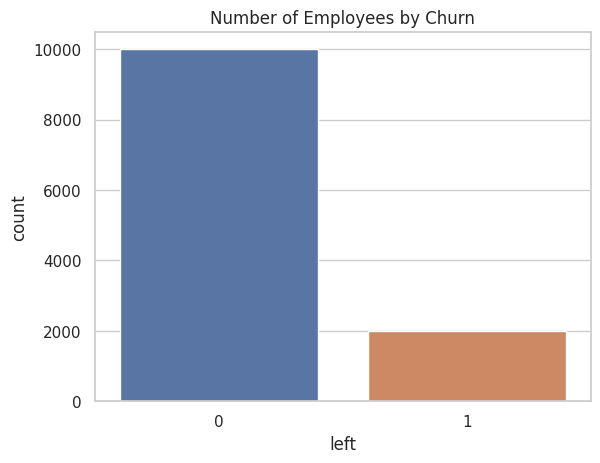

In [21]:
plt.title("Number of Employees by Churn")
sns.countplot(x='left', data=df)
plt.show()
#The data shows that most of the employees stayed in the company.

In [22]:
df.left.value_counts()

0    10000
1     1991
Name: left, dtype: int64

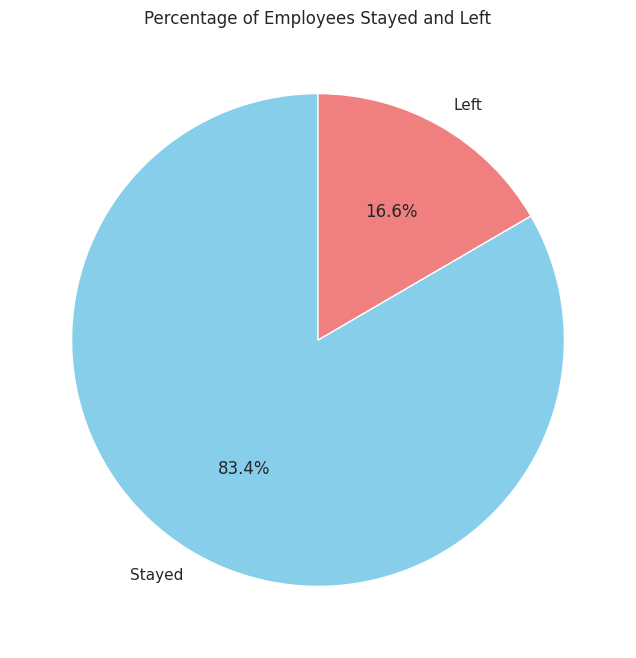

In [23]:
# Replace 0 with 'Stayed' and 1 with 'Left'
df['left'] = df['left'].replace({0: 'Stayed', 1: 'Left'})

# Calculate the percentage of each category in the 'Left' column
left_counts = df['left'].value_counts(normalize=True) * 100

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(left_counts, labels=left_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Percentage of Employees Stayed and Left')
plt.show()

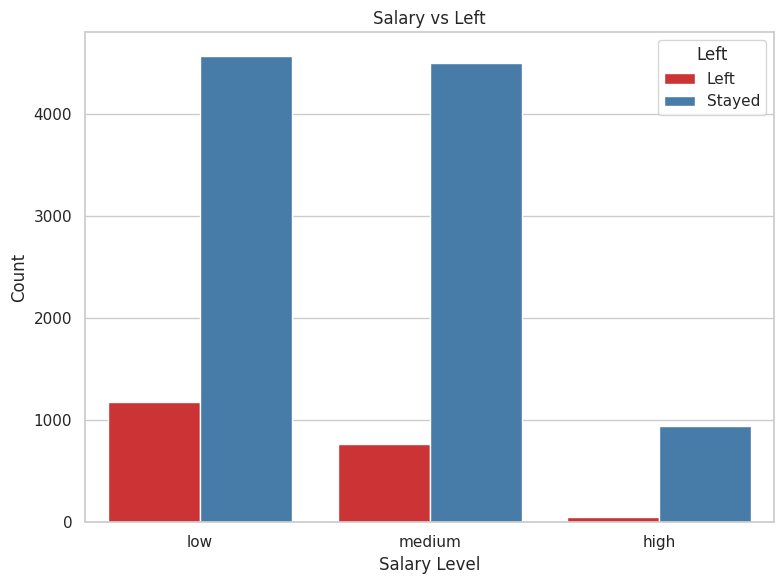

In [24]:
sns.set_palette("Set1")

# Create a count plot for Salary vs Left
plt.figure(figsize=(8, 6))
sns.countplot(x='salary', hue='left', data=df)
plt.xlabel('Salary Level')
plt.ylabel('Count')
plt.title('Salary vs Left')
plt.legend(title='Left', loc='upper right')
plt.tight_layout()
plt.show()


In [25]:
#From the plot, we can see that there is a slight correlation between salary and the left column.
#  the ratio of leaving the company in each category :
#  high = 4.8%
#  medium = 14 %
#  low = 47%

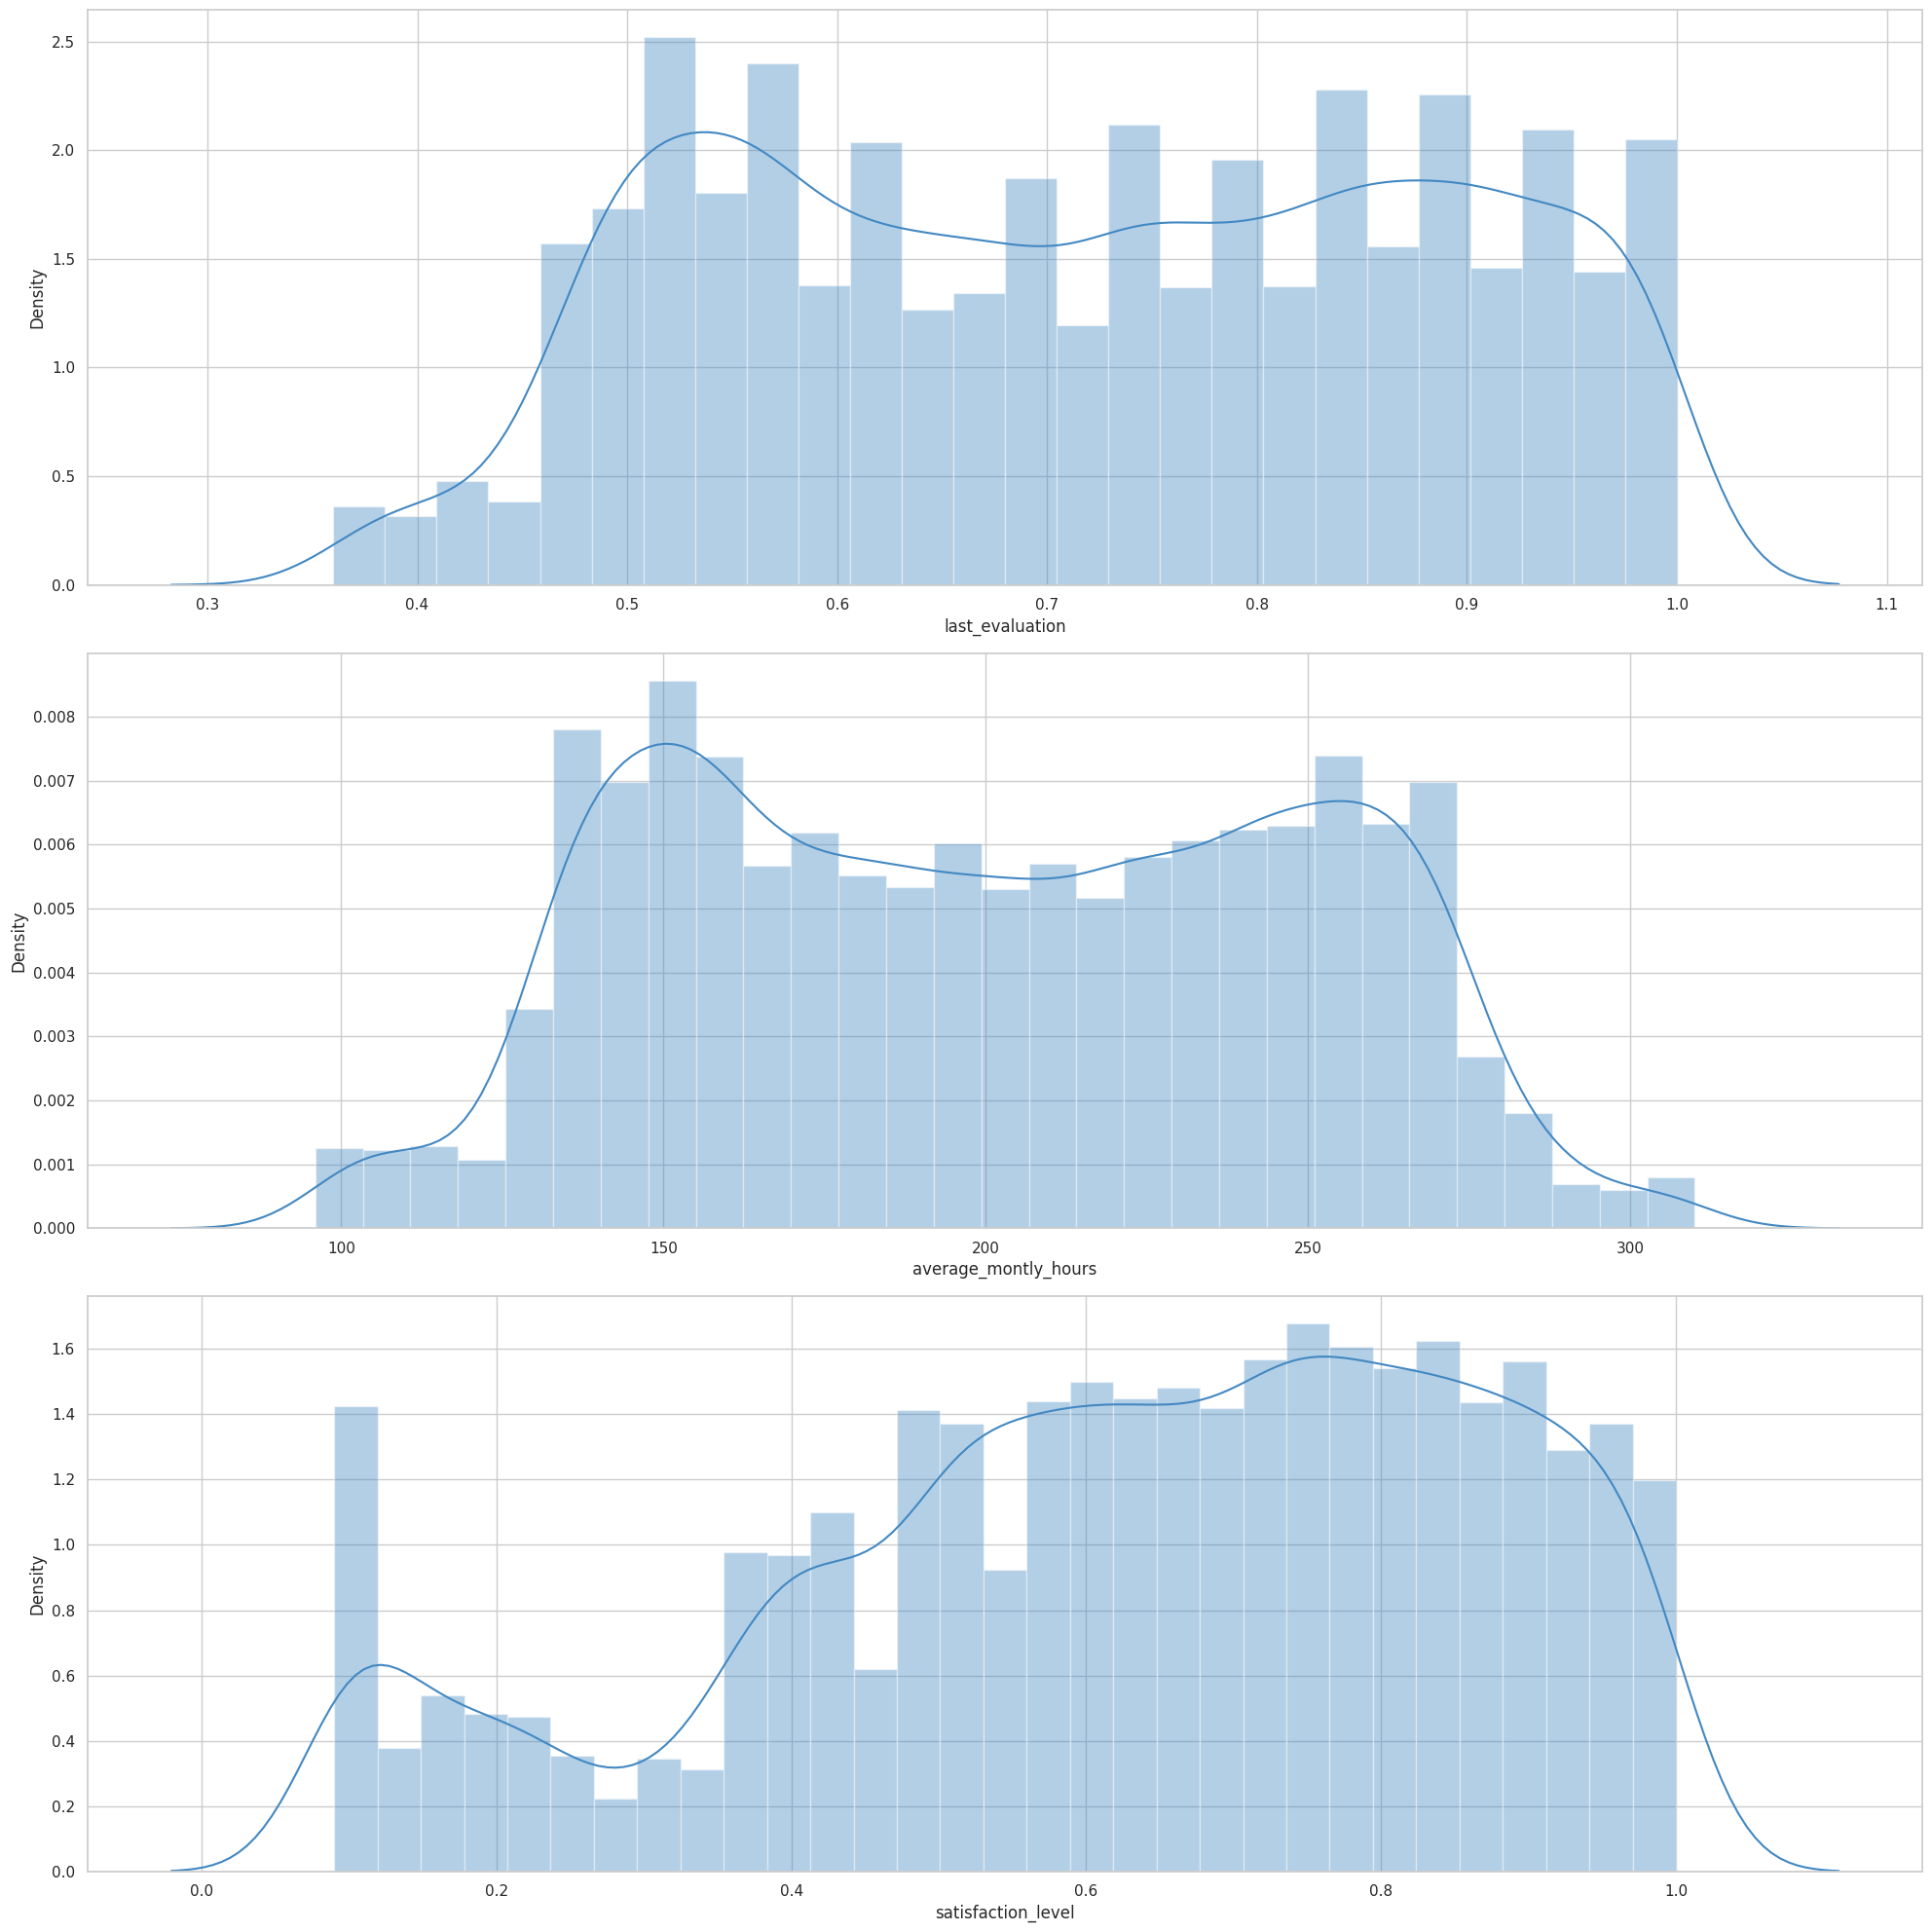

In [26]:
plt.figure(figsize = (20, 20))
column=["last_evaluation","average_montly_hours", 'satisfaction_level']
for i in range(0,3):
    plt.subplot(3, 1, i+1)
    sns.distplot(df[column[i]], color="#4288c2")    #histplot,distplot
    plt.tight_layout()
#The graph represents the distribution of the data.

<Axes: >

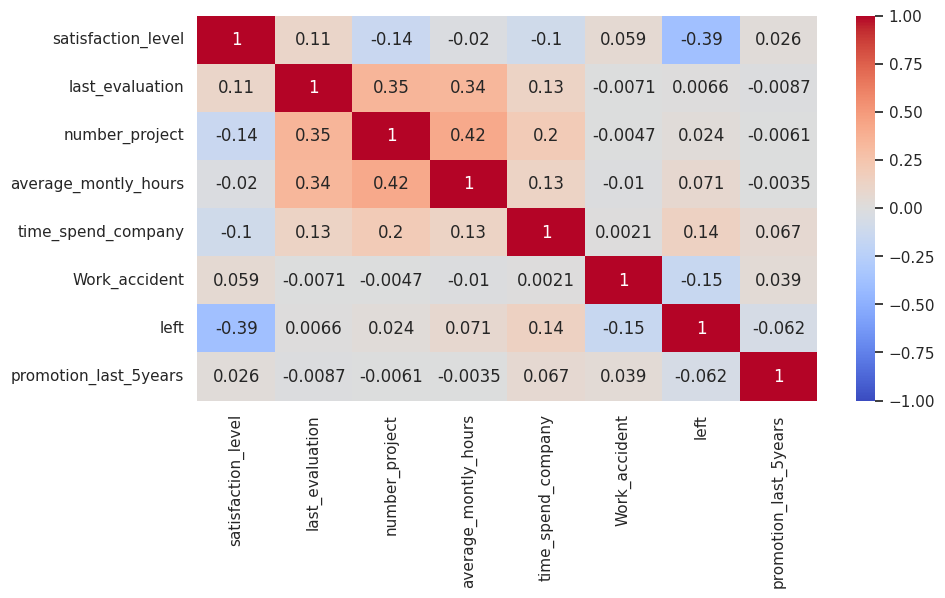

In [27]:
plt.figure(figsize=(10,5))
sns.heatmap(df2.corr(), annot = True, vmin=-1, vmax=1, cmap="coolwarm")

There is no strong correlation evident in the data.

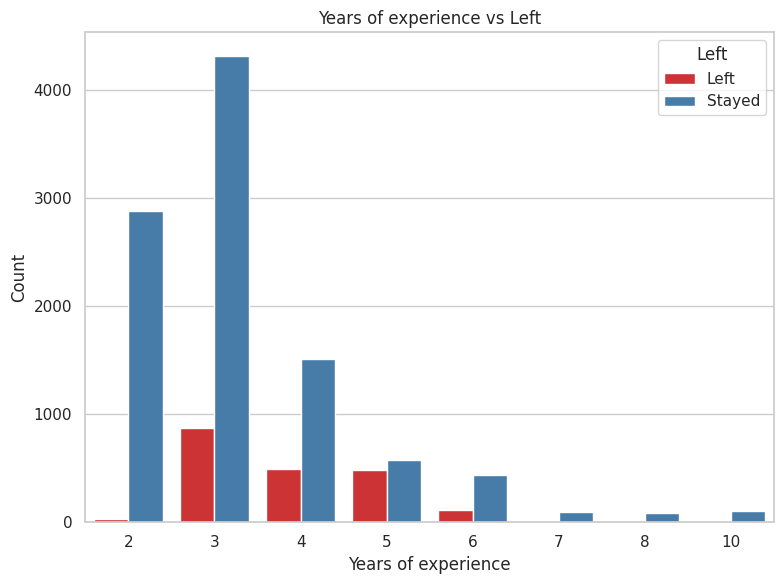

In [28]:
sns.set_palette("Set1")

# Create a count plot for time_spend_company vs Left
plt.figure(figsize=(8, 6))
sns.countplot(x='time_spend_company', hue='left', data=df)
plt.xlabel('Years of experience')
plt.ylabel('Count')
plt.title('Years of experience vs Left')
plt.legend(title='Left', loc='upper right')
plt.tight_layout()
plt.show()

Employees who have spent more than 7 years in the company tend to exhibit more loyalty and are more likely to stay

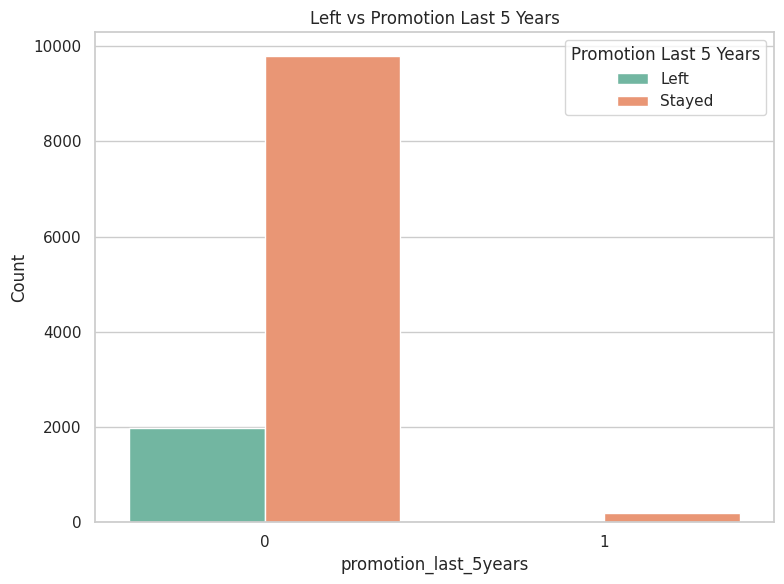

In [29]:
#Left vs promotion_last_5years
# Set a Seaborn color palette for the bar plot
sns.set_palette("Set2")

# Create a bar plot comparing Left vs promotion_last_5years
plt.figure(figsize=(8, 6))
sns.countplot(x='promotion_last_5years', hue='left', data=df)
plt.xlabel('promotion_last_5years')
plt.ylabel('Count')
plt.title('Left vs Promotion Last 5 Years')
plt.legend(title='Promotion Last 5 Years', loc='upper right')
plt.xticks(ticks=[0, 1])  # Replace with your actual labels if needed
plt.tight_layout()
plt.show()

In [30]:
is_left.promotion_last_5years.value_counts()

0    1983
1       8
Name: promotion_last_5years, dtype: int64

There are employees who leave the company after receiving a promotion.

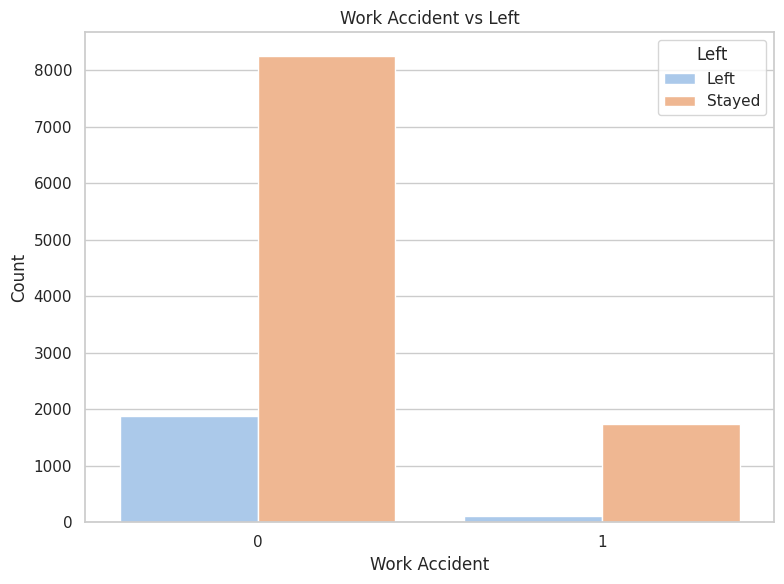

In [31]:
# Set a Seaborn color palette for the bar plot
sns.set_palette("pastel")

# Create a count plot for Work_accident vs Left
plt.figure(figsize=(8, 6))
sns.countplot(x='Work_accident', hue='left', data=df)
plt.xlabel('Work Accident')
plt.ylabel('Count')
plt.title('Work Accident vs Left')
plt.legend(title='Left', loc='upper right')
plt.tight_layout()
plt.show()

There is no strong relation between work accidents and employees leaving the company.

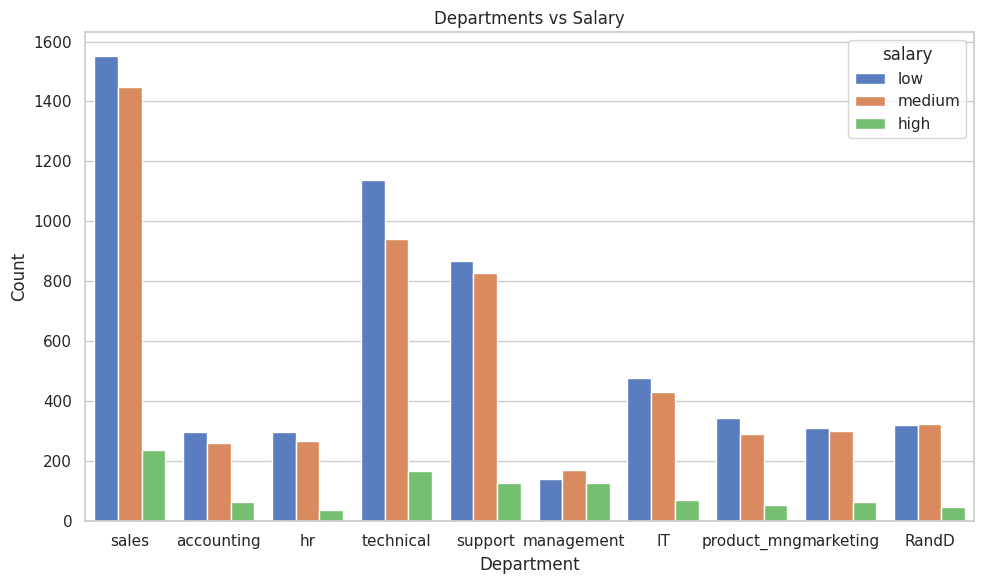

In [32]:
# Set a Seaborn color palette for the count plot
sns.set_palette("muted")

# Create a count plot for Departments vs salary
plt.figure(figsize=(10, 6))
sns.countplot(x='Departments ', hue='salary', data=df)
plt.xlabel('Department')
plt.ylabel('Count')
plt.title('Departments vs Salary')
plt.tight_layout()
plt.show()

Here we can observe that the "Sales" and "IT and Support" departments have a moderate number of employees.
We will investigate if there is a higher rate of employee turnover in these departments.

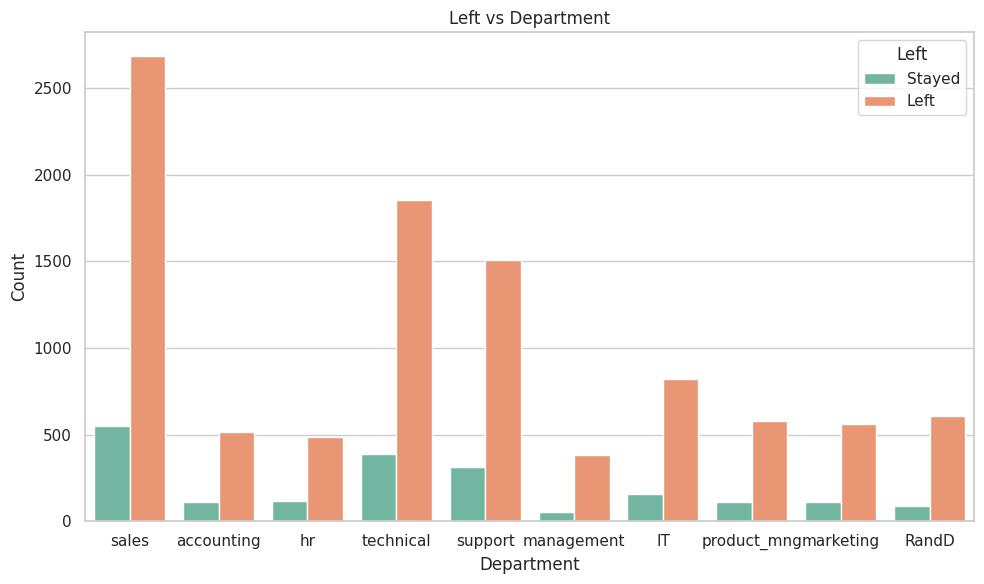

In [33]:
# Set a Seaborn color palette for the count plot
sns.set_palette("Set2")

# Create a count plot for Left vs Department
plt.figure(figsize=(10, 6))
sns.countplot(x='Departments ', hue='left', data=df)
plt.xlabel('Department')
plt.ylabel('Count')
plt.title('Left vs Department')
plt.legend(title='Left', loc='upper right', labels=['Stayed', 'Left'])
plt.tight_layout()
plt.show()

The departments with low salaries have the highest number of employees leaving the company.

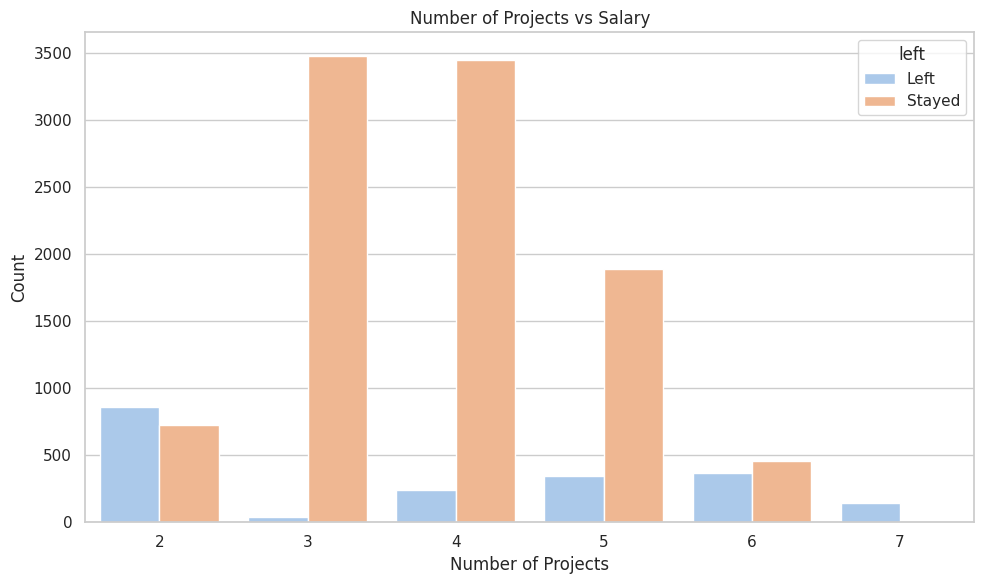

In [34]:
# Set a Seaborn color palette for the count plot
sns.set_palette("pastel")

# Create a count plot for number_project vs salary
plt.figure(figsize=(10, 6))
sns.countplot(x='number_project', hue='left', data=df)
plt.xlabel('Number of Projects')
plt.ylabel('Count')
plt.title('Number of Projects vs Salary')
plt.legend(title='left', loc='upper right')
plt.tight_layout()
plt.show()

We can observe that employees who worked on an average number of projects tend to stay with the company.

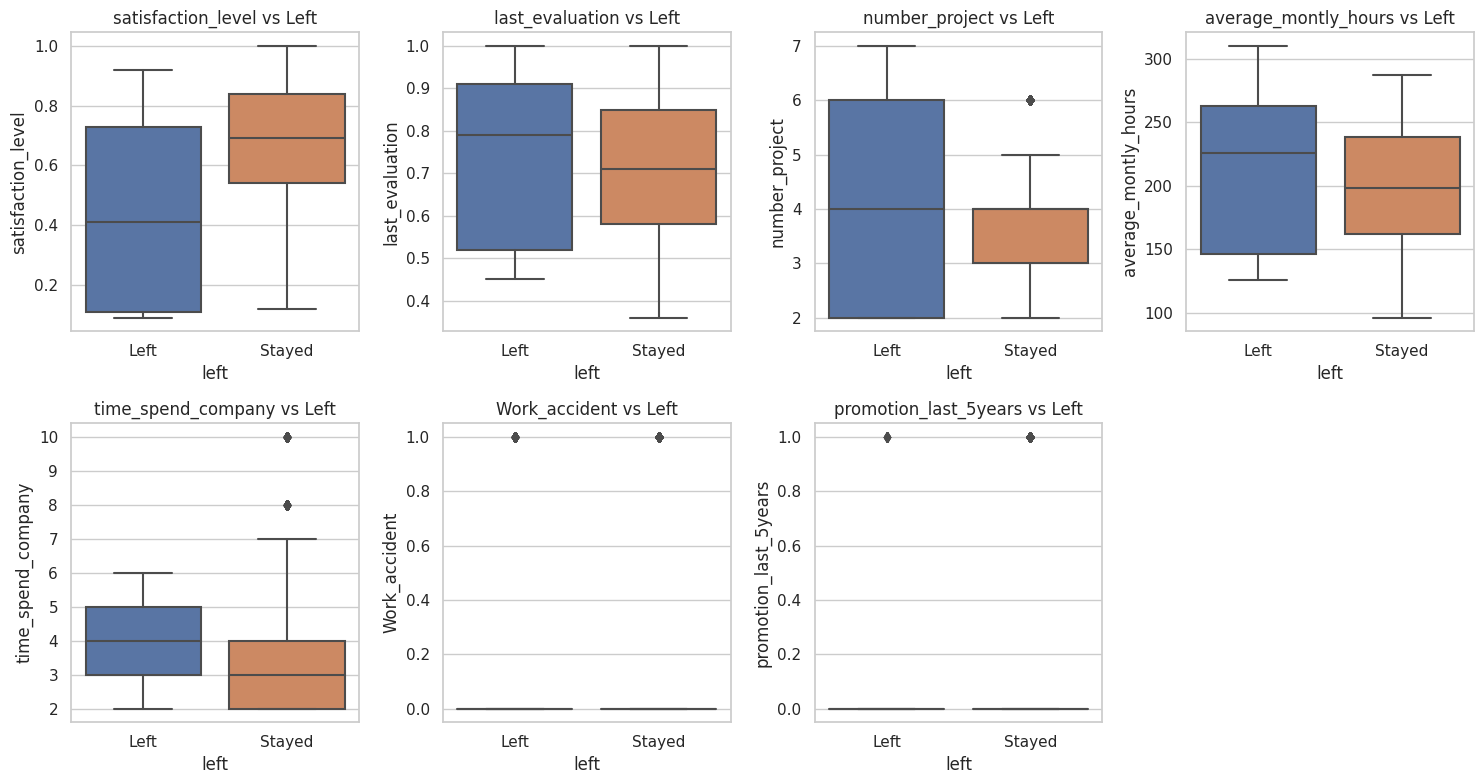

In [35]:
# Extract numerical features for box plots
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

# Set a Seaborn style for the plot
sns.set(style="whitegrid")

# Create box plots for each numerical feature
plt.figure(figsize=(15, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x='left', y=feature, data=df)
    plt.title(f'{feature} vs Left')

plt.tight_layout()
plt.show()


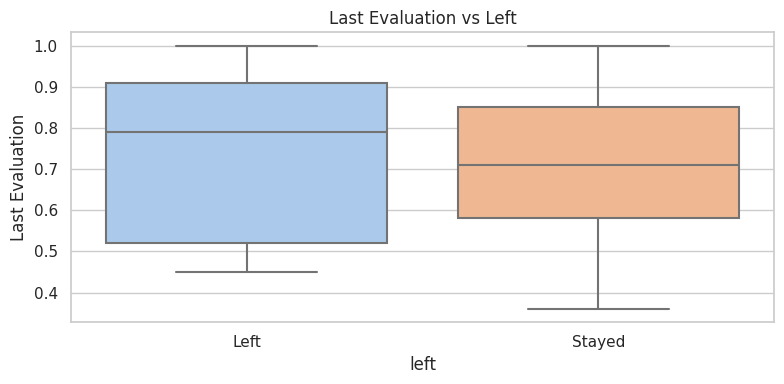

In [36]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='left', y='last_evaluation', data=df, palette='pastel')
plt.ylabel('Last Evaluation')
plt.title('Last Evaluation vs Left')
plt.tight_layout()
plt.show()

The average evaluation score of employees who left the company is higher than the average evaluation score of those who stayed.

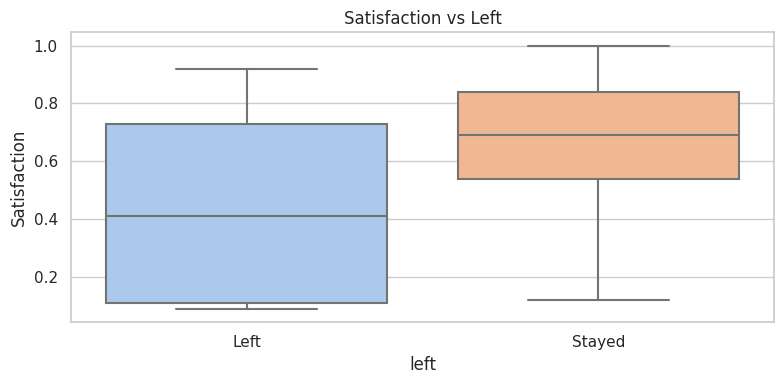

In [37]:
# Create a box plot between satisfaction and left
plt.figure(figsize=(8, 4))
sns.boxplot(x='left', y='satisfaction_level', data=df, palette='pastel')
plt.ylabel('Satisfaction')
plt.title('Satisfaction vs Left')
plt.tight_layout()
plt.show()

The average level of satisfaction of employees who left the company is lower than that of those who stayed.

In [38]:
#convert the left column to numerical using "mapping"
mapping = {'Stayed': 0, 'Left': 1}
df['left'] = df['left'].map(mapping)
print(df['left'])

0        1
1        1
2        1
3        1
4        1
        ..
11995    0
11996    0
11997    0
11998    0
11999    0
Name: left, Length: 11991, dtype: int64


In [39]:
df['left'].value_counts()

0    10000
1     1991
Name: left, dtype: int64

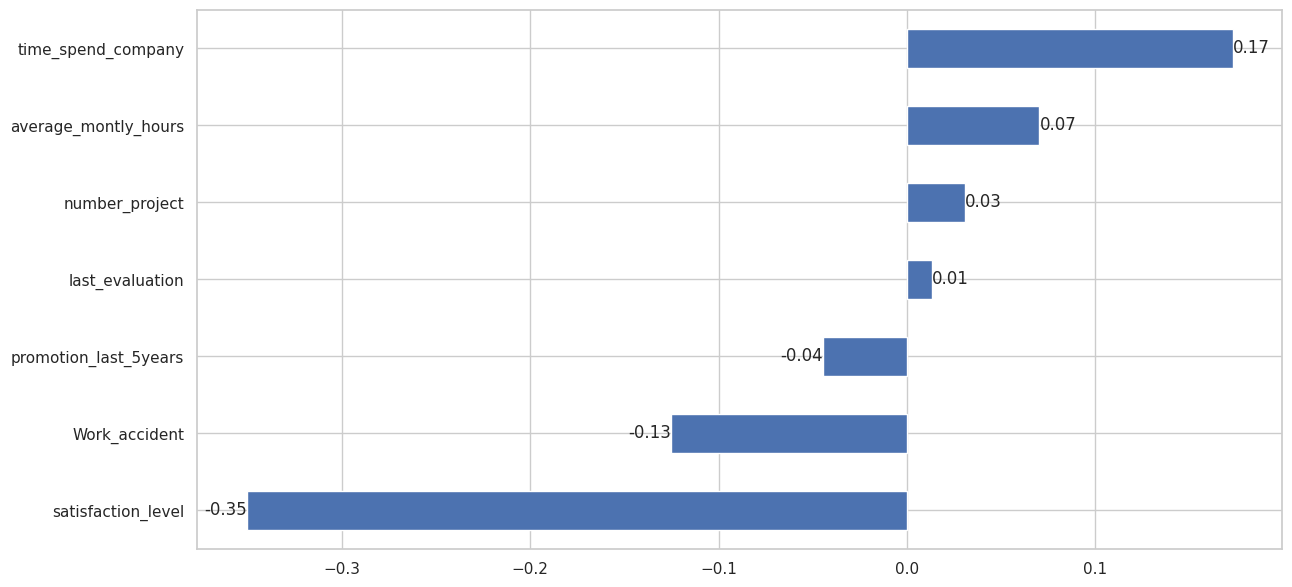

In [40]:
plt.figure(figsize=(14,7))
ax = df.corr()["left"].drop("left").sort_values().plot.barh()
ax.bar_label(ax.containers[0], fmt='%.2f');

The level of satisfaction has a strong negative correlation with the 'left' column.

### Scaling the data

In [41]:
cat_onehot = ["Departments "]

ordinal = ['salary']
ord_for_salary = ['low', 'medium', 'high']

In [42]:
column_trans = make_column_transformer(
                        (OneHotEncoder(handle_unknown="ignore", sparse=False), cat_onehot),
                        (OrdinalEncoder(categories= [ord_for_salary],
                                       handle_unknown="use_encoded_value",
                                        unknown_value=-1) ,ordinal),
                        remainder= StandardScaler(),
                         verbose_feature_names_out=False)

column_trans=column_trans.set_output(transform="pandas")

In [43]:
from sklearn.pipeline import Pipeline
operations = [("encoder", column_trans)]

pipeline = Pipeline(steps=operations)

In [44]:
scaled_df = pipeline.fit_transform(df)

In [45]:
scaled_df

,Departments _IT,Departments _RandD,Departments _accounting,Departments _hr,Departments _management,Departments _marketing,Departments _product_mng,Departments _sales,Departments _support,Departments _technical,salary,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.035668,-1.108990,-1.549921,-0.892208,-0.274291,-0.427116,2.241116,-0.131228
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.706637,0.851380,1.029194,1.262709,1.981036,-0.427116,2.241116,-0.131228
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-2.155721,0.970190,2.748604,1.467939,0.477485,-0.427116,2.241116,-0.131228
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.374770,0.910785,1.029194,0.462311,1.229261,-0.427116,2.241116,-0.131228
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.077151,-1.168396,-1.549921,-0.851162,-0.274291,-0.427116,2.241116,-0.131228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.121472,-0.990180,-0.690216,1.201140,4.988139,2.341286,-0.446206,7.620300
11996,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.457736,1.386026,1.029194,1.344801,4.988139,-0.427116,-0.446206,7.620300
11997,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.914054,-1.049585,-0.690216,-0.317563,4.988139,-0.427116,-0.446206,7.620300
11998,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,-1.243085,-0.396129,-0.690216,-0.584363,4.988139,-0.427116,-0.446206,7.620300


In [46]:
df_cluster = scaled_df.drop(["left"], axis=1)
df_cluster
#delete the target column

,Departments _IT,Departments _RandD,Departments _accounting,Departments _hr,Departments _management,Departments _marketing,Departments _product_mng,Departments _sales,Departments _support,Departments _technical,salary,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.035668,-1.108990,-1.549921,-0.892208,-0.274291,-0.427116,-0.131228
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.706637,0.851380,1.029194,1.262709,1.981036,-0.427116,-0.131228
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-2.155721,0.970190,2.748604,1.467939,0.477485,-0.427116,-0.131228
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.374770,0.910785,1.029194,0.462311,1.229261,-0.427116,-0.131228
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.077151,-1.168396,-1.549921,-0.851162,-0.274291,-0.427116,-0.131228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.121472,-0.990180,-0.690216,1.201140,4.988139,2.341286,7.620300
11996,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.457736,1.386026,1.029194,1.344801,4.988139,-0.427116,7.620300
11997,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.914054,-1.049585,-0.690216,-0.317563,4.988139,-0.427116,7.620300
11998,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,-1.243085,-0.396129,-0.690216,-0.584363,4.988139,-0.427116,7.620300


## 4. Cluster Analysis

In [47]:
features = ['time_spend_company', 'average_montly_hours', 'last_evaluation', 'number_project', 'satisfaction_level']

In [48]:
df_cluster_f =  df_cluster[['time_spend_company', 'average_montly_hours', 'last_evaluation', 'number_project', 'satisfaction_level']
].copy()

In [49]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

# Calculating Hopkins score to know whether the data is good for clustering or not.
def hopkins(X):
    d = X.shape[1]
    n = len(X)
    m = int(0.1 * n)
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
    rand_X = sample(range(0, n, 1), m)
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
    HS = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(HS):
        print(ujd, wjd)
        HS = 0
    return HS

In [50]:
hopkins(df_cluster_f)

0.7993853512977332

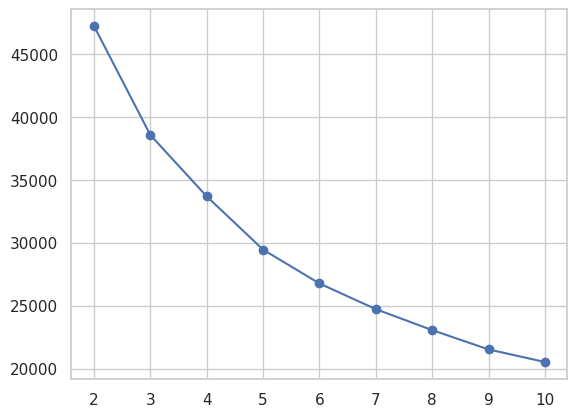

In [51]:
from sklearn.cluster import KMeans

n_clusters = []
for i in range(2,11):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(df_cluster_f)
    n_clusters.append(kmeans.inertia_)

# plot elbow graph
plt.plot(range(2,11),n_clusters,marker='o');

In [52]:
from sklearn.metrics import silhouette_score

range_n_clusters = range(2, 11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(df_cluster_f)
    clusterlabels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(df_cluster_f, clusterlabels)
    print(
        f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}"
    )
#The higher silhouette score indicates better clustering quality

For n_clusters=2, the silhouette score is 0.25961542026228807
For n_clusters=3, the silhouette score is 0.2203935654748894
For n_clusters=4, the silhouette score is 0.24479337064729875
For n_clusters=5, the silhouette score is 0.22997374427911524
For n_clusters=6, the silhouette score is 0.22753182384253376
For n_clusters=7, the silhouette score is 0.2320757156417704
For n_clusters=8, the silhouette score is 0.22830039013972464
For n_clusters=9, the silhouette score is 0.23427169944936405
For n_clusters=10, the silhouette score is 0.23169417787812752


Text(0.5, 1.0, 'elbow method')

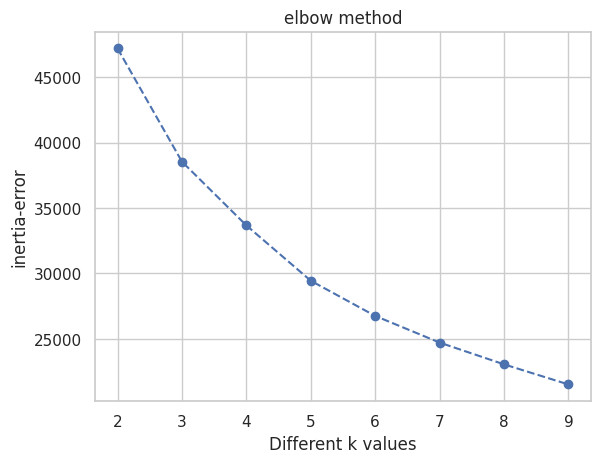

In [53]:
ssd = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k,
                   random_state=42)
    model.fit(df_cluster_f)
    ssd.append(model.inertia_)
plt.plot(K, ssd, "bo--")
plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("elbow method")

In [54]:
-pd.Series(ssd).diff()

0            NaN
1    8659.445189
2    4874.004118
3    4231.992065
4    2689.984662
5    2038.140352
6    1665.632724
7    1536.429239
dtype: float64

In [55]:
from sklearn.cluster import KMeans

kmeans3 = KMeans(n_clusters=3, random_state=42)
kmeans3.fit(df_cluster_f)
df_cluster_f["Clusters"]=(kmeans3.labels_+1)

In [56]:
df_cluster_f.Clusters.value_counts()

1    6288
2    3357
3    2346
Name: Clusters, dtype: int64

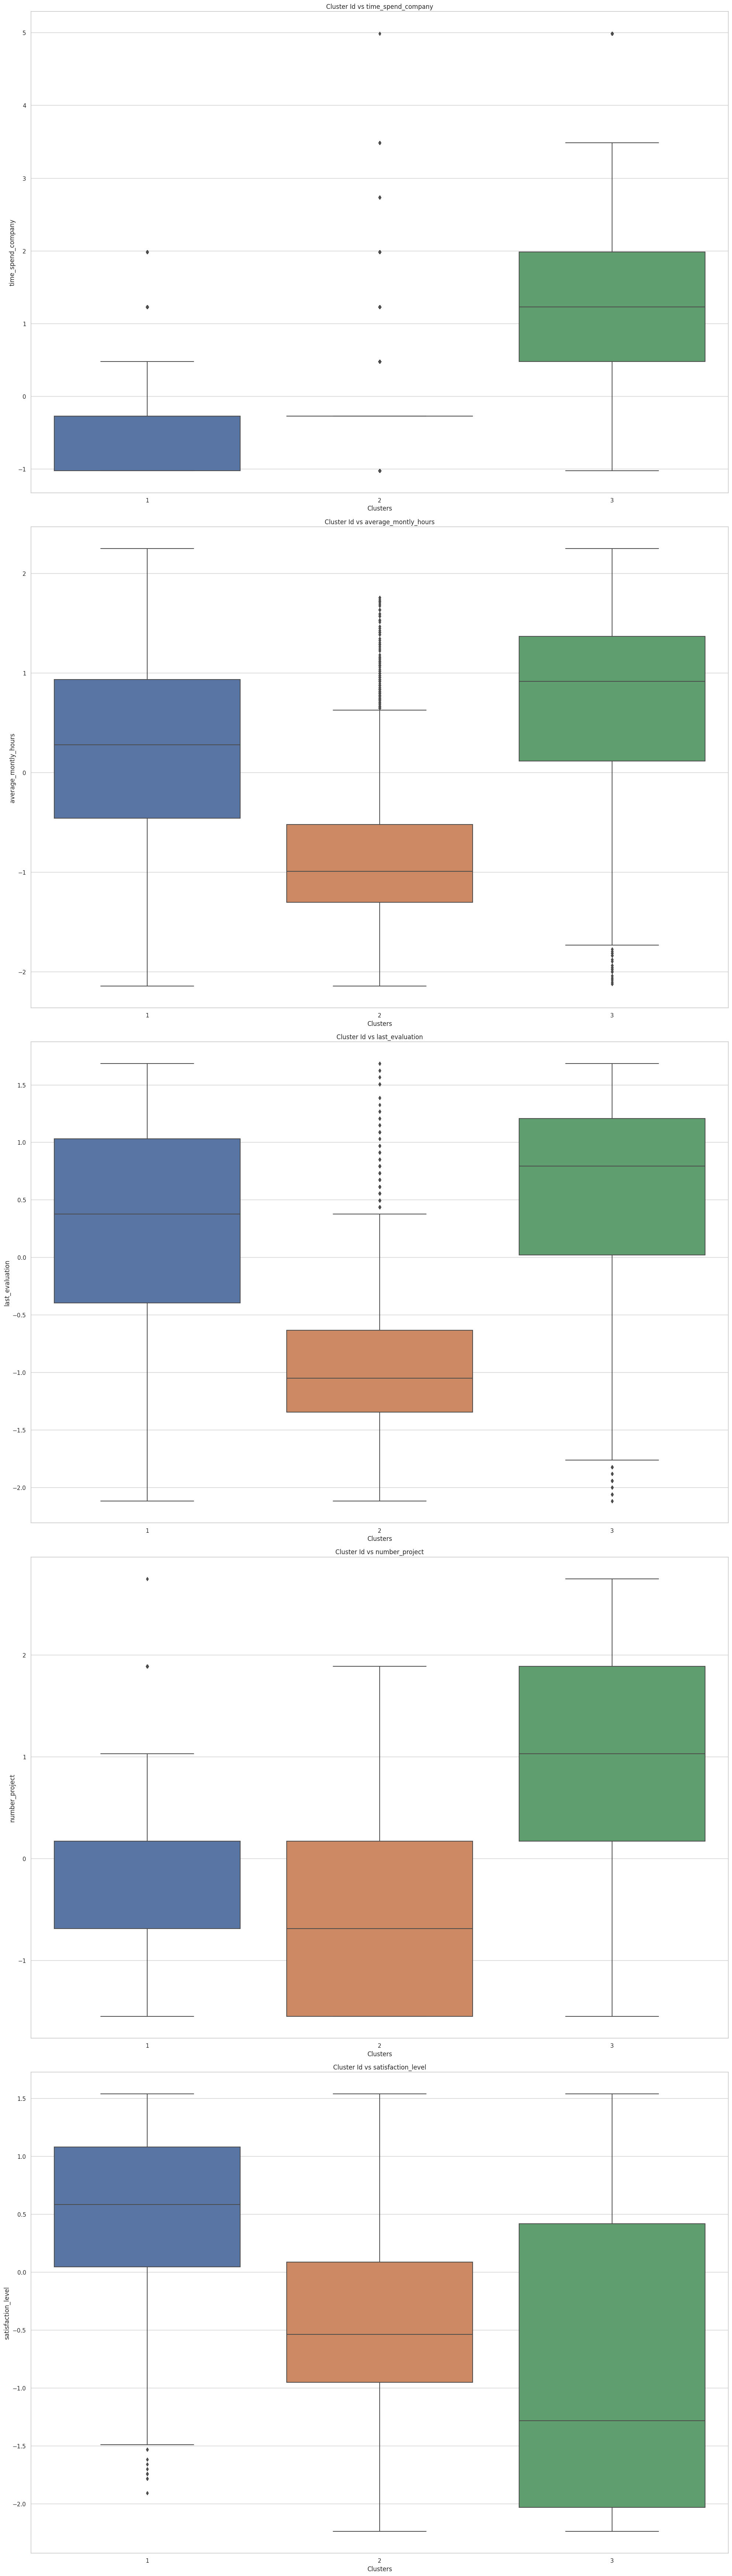

In [57]:
# Set the figure size
plt.figure(figsize=(20, 70))


# Number of clusters
num_clusters = df_cluster_f['Clusters'].nunique()

# Loop through each feature
for i, feature in enumerate(features, 1):
    plt.subplot(len(features), 1, i)
    sns.boxplot(x='Clusters', y=feature, data=df_cluster_f)
    plt.title(f'Cluster Id vs {feature}')

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

*We will use the best features that give us an insight into the clusters and make them more readable.*

In [58]:
# Define the mapping for cluster labels
cluster_mapping = {
    1: 'LOYAL EMPLOYEE',
    2: 'ENTRY-LEVEL EMPLOYEE',
    3: 'LIKELY TO LEAVE'
}

df_cluster_f['Clusters'] = df_cluster_f['Clusters'].replace(cluster_mapping)

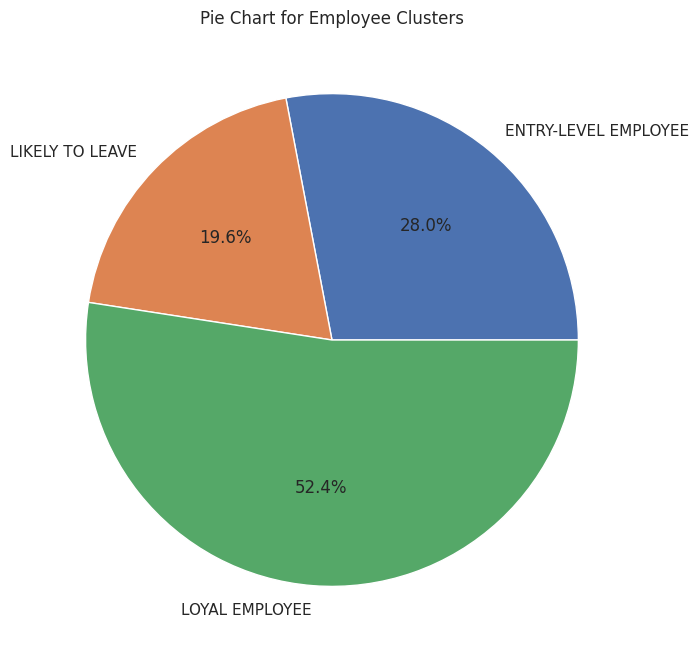

In [59]:
plt.figure(figsize=(8, 8))

# Unique labels in your 'Clusters' column
labels = df_cluster_f['Clusters'].unique()

# Counting occurrences of each unique label
sizes = [df_cluster_f[df_cluster_f['Clusters'] == label].shape[0] for label in labels]

# Plotting the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%')

# Adding a title
plt.title('Pie Chart for Employee Clusters')

# Displaying the chart
plt.show()

In [60]:
# Merge the original DataFrame with the clusters DataFrame
merged_df = pd.concat([df, df_cluster_f['Clusters']], axis=1)

# Display the merged DataFrame
merged_df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary,Clusters
0,0.38,0.53,2,157,3,0,1,0,sales,low,ENTRY-LEVEL EMPLOYEE
1,0.80,0.86,5,262,6,0,1,0,sales,medium,LIKELY TO LEAVE
2,0.11,0.88,7,272,4,0,1,0,sales,medium,LIKELY TO LEAVE
3,0.72,0.87,5,223,5,0,1,0,sales,low,LIKELY TO LEAVE
4,0.37,0.52,2,159,3,0,1,0,sales,low,ENTRY-LEVEL EMPLOYEE
...,...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,management,high,LIKELY TO LEAVE
11996,0.74,0.95,5,266,10,0,0,1,management,high,LIKELY TO LEAVE
11997,0.85,0.54,3,185,10,0,0,1,management,high,LIKELY TO LEAVE
11998,0.33,0.65,3,172,10,0,0,1,marketing,high,LIKELY TO LEAVE


### *RECOMINDATIONS* >>> take it from above

* **Cluster One - "BEST EMPLOYEE"**

**Recognition and Rewards:** Acknowledge and appreciate the efforts of employees in this cluster. Consider implementing a recognition program or rewards for their exceptional performance.

**Professional Development:** Offer opportunities for professional growth and development. These employees have shown high potential, and investing in their skills can benefit both the employees and the company.

**Satisfaction Surveys:** Despite their high performance, it's essential to regularly check their satisfaction levels. Conduct surveys to understand their needs, expectations, and areas where improvements can be made.

* **Cluster Two - "ALMOST LEFT"**

**Performance Feedback:** Provide constructive feedback and support for improvement. Identify areas where they are struggling and offer assistance or training to help them meet expectations.

**Mentorship Program:** Consider implementing a mentorship program where employees in Cluster Two can be paired with more experienced colleagues from Cluster One. This can provide guidance and support for their professional development.

**Employee Assistance Program (EAP):** If there are signs of stress or dissatisfaction, consider offering counseling services or an EAP to address personal or work-related challenges.

* **Cluster Three - "NORMAL EMPLOYEE"**

**Maintain Engagement:**
While these employees are performing adequately, it's crucial to keep them engaged. Implement initiatives such as team-building activities, workshops, or social events to foster a positive work environment.

**Opportunities** for Growth: Offer opportunities for skill development and advancement. Encourage them to set career goals and provide the necessary resources to achieve those goals.

**Flexible Work Options:** Consider offering flexible work arrangements or additional perks to enhance work-life balance and job satisfaction.



```
# This is formatted as code
```

## 4 Clusters

---



**Considering that three clusters demonstrate similar behavior, it may not be optimal to have four separate clusters. As a result, it would be more appropriate to combine these three clusters into one, as they exhibit similar characteristics. This consolidation will allow for a more accurate representation of the data and a clearer understanding of the underlying patterns.**

In [61]:
df_cluster_4 = df_cluster[['time_spend_company', 'average_montly_hours', 'last_evaluation', 'number_project', 'satisfaction_level']]

In [62]:
from sklearn.cluster import KMeans

kmeans4 = KMeans(n_clusters=4, random_state=42)
kmeans4.fit(df_cluster_4)
df_cluster_4["Clusters"]=(kmeans4.labels_+1)

In [63]:
df_cluster_4.Clusters.value_counts()

4    6290
2    3118
3    1362
1    1221
Name: Clusters, dtype: int64

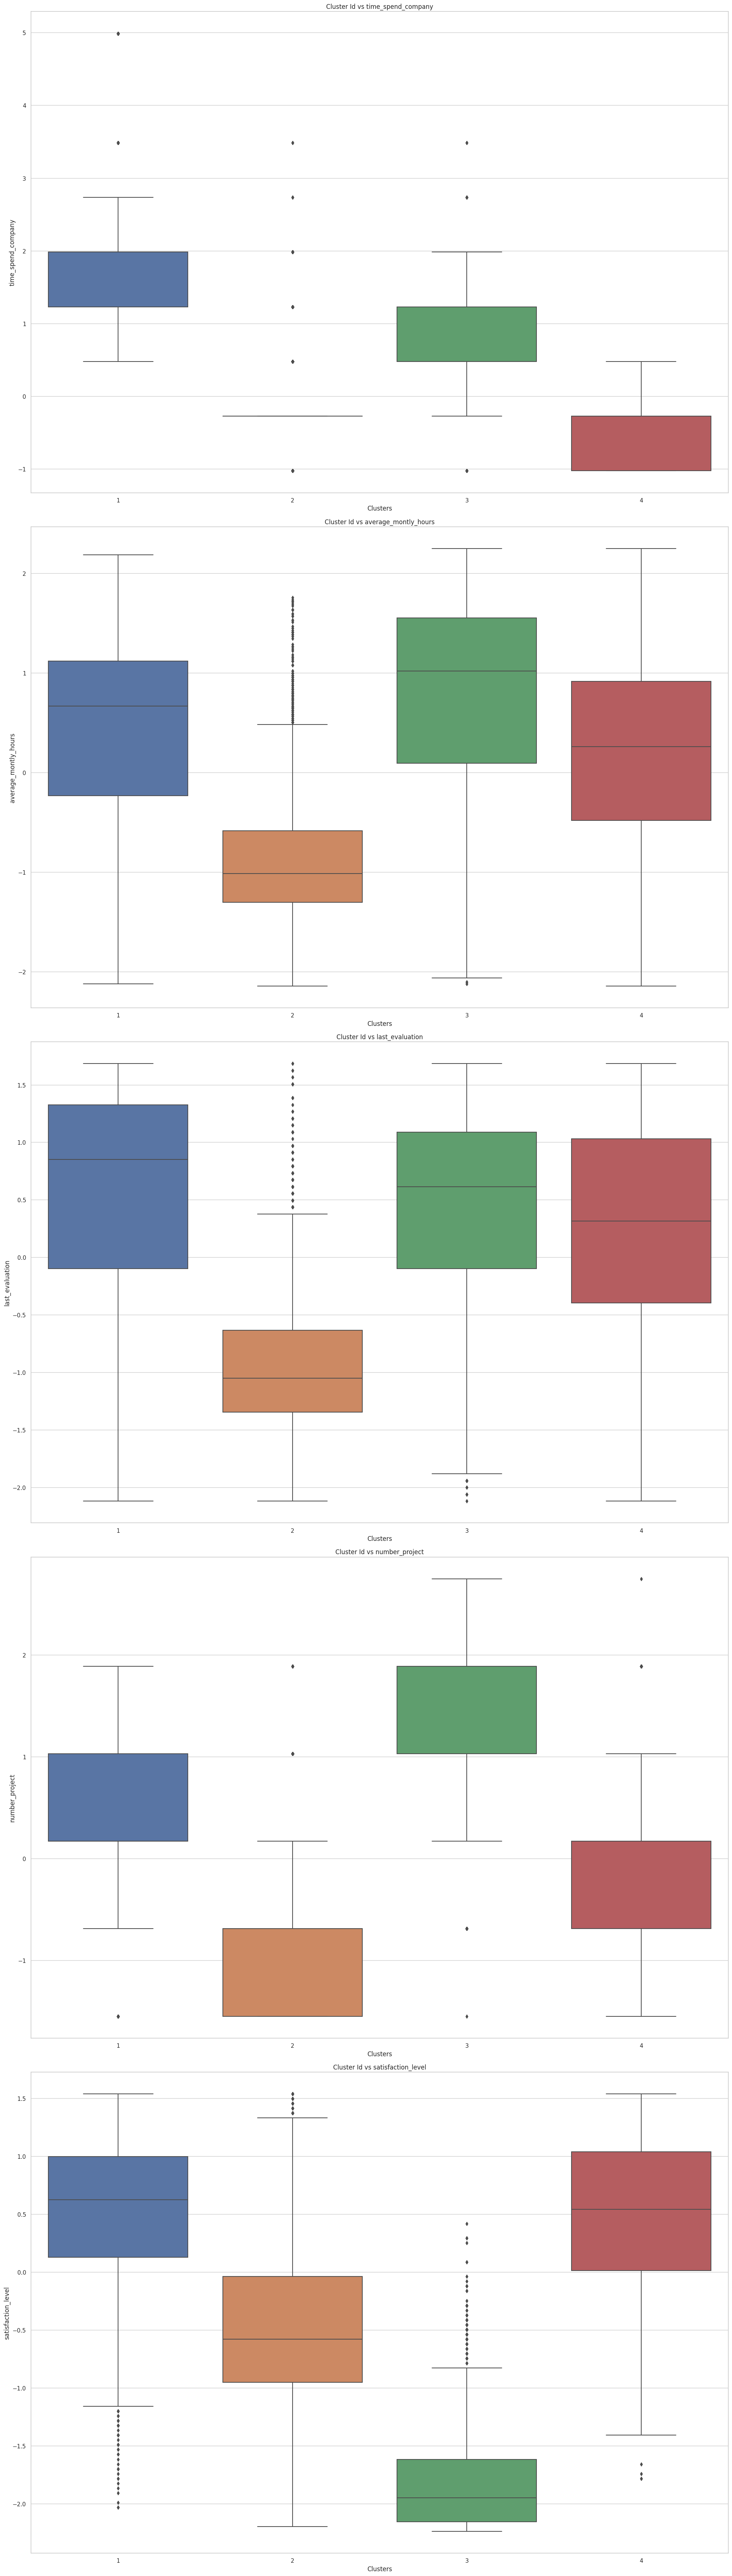

In [64]:
# Set the figure size
plt.figure(figsize=(20, 70))


# Number of clusters
num_clusters = df_cluster_4['Clusters'].nunique()

# Loop through each feature
for i, feature in enumerate(features, 1):
    plt.subplot(len(features), 1, i)
    sns.boxplot(x='Clusters', y=feature, data=df_cluster_4)
    plt.title(f'Cluster Id vs {feature}')

# Adjust layout for better visualization
plt.tight_layout()
plt.show()


* **Cluster 1** This cluster has the moderate number of projects, high evaluation score, the longest tenure in the company, However, the satisfaction level within this cluster is high. It is likely that employees in this cluster will stay in the company. Therefore, we can name this cluster "LOYAL EMPLOYEE" employees.

* **Cluster 2** This cluster has the lowest  number of projects, the lowest evaluation,short tenure in the company, However, the satisfaction level within this cluster is average. It is likely that employees in this cluster will stay in the company. Therefore, we can name this cluster "AVERAGE EMPLOYEE" employees. focusing on their development, providing ongoing support, and creating opportunities for growth, we can foster an environment that encourages their continued commitment to the company.

* **Cluster 3** This cluster has the highest number of projects, average evaluation, the longest tenure in the company, and the average values of the month slightly high. However, the satisfaction level within this cluster is notably low. It is likely that employees in this cluster will leave the company. Therefore, we can name this cluster "LIKELY TO LEAVE" employees. Additionally, we should prioritize efforts to retain these employees and improve their satisfaction levels.

* **Cluster 4** This cluster has low number of projects, average evaluation, the shortest tenure in the company. However, the satisfaction level within this cluster is high. It is likely that employees in this cluster will leave the company. Therefore, we can name this cluster ""ENTRY-LEVEL EMPLOYEE"" employees. focusing on their development, providing ongoing support, and creating opportunities for growth, we can foster an environment that encourages their continued commitment to the company.

In [65]:
# Define the mapping for cluster labels
cluster_mapping = {
    1: 'BEST EMPLOYEE',
    2: 'AVERAGE EMPLOYEE',
    3: 'LIKELY TO LEAVE',
    4: 'ENTRY-LEVEL EMPLOYEE'
}

df_cluster_4['Clusters'] = df_cluster_4['Clusters'].replace(cluster_mapping)

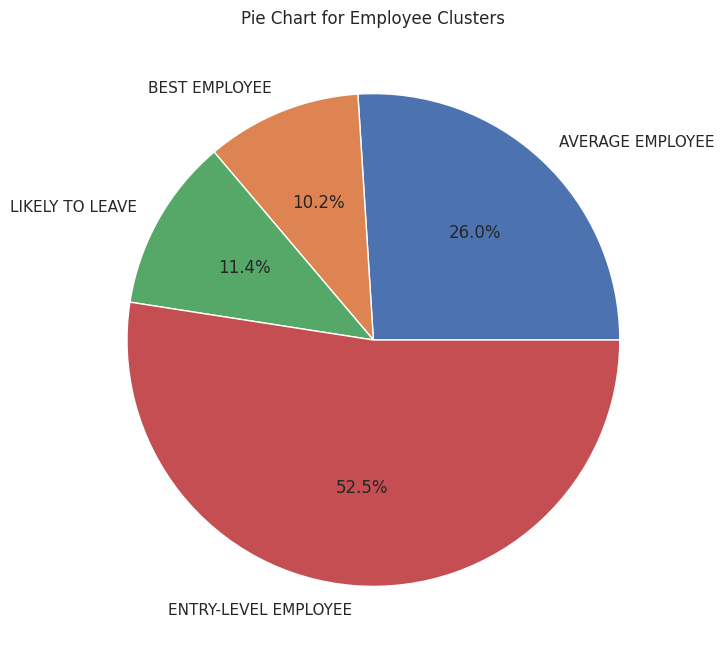

In [66]:
plt.figure(figsize=(8, 8))

# Unique labels in your 'Clusters' column
labels = df_cluster_4['Clusters'].unique()

# Counting occurrences of each unique label
sizes = [df_cluster_4[df_cluster_4['Clusters'] == label].shape[0] for label in labels]

# Plotting the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%')

# Adding a title
plt.title('Pie Chart for Employee Clusters')

# Displaying the chart
plt.show()

In [67]:
# Merge the original DataFrame with the clusters DataFrame
merged_df = pd.concat([df, df_cluster_4['Clusters']], axis=1)

# Display the merged DataFrame
merged_df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary,Clusters
0,0.38,0.53,2,157,3,0,1,0,sales,low,AVERAGE EMPLOYEE
1,0.80,0.86,5,262,6,0,1,0,sales,medium,BEST EMPLOYEE
2,0.11,0.88,7,272,4,0,1,0,sales,medium,LIKELY TO LEAVE
3,0.72,0.87,5,223,5,0,1,0,sales,low,BEST EMPLOYEE
4,0.37,0.52,2,159,3,0,1,0,sales,low,AVERAGE EMPLOYEE
...,...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,management,high,BEST EMPLOYEE
11996,0.74,0.95,5,266,10,0,0,1,management,high,BEST EMPLOYEE
11997,0.85,0.54,3,185,10,0,0,1,management,high,BEST EMPLOYEE
11998,0.33,0.65,3,172,10,0,0,1,marketing,high,BEST EMPLOYEE


In [68]:
df_cluster_4['Clusters'].value_counts()

ENTRY-LEVEL EMPLOYEE    6290
AVERAGE EMPLOYEE        3118
LIKELY TO LEAVE         1362
BEST EMPLOYEE           1221
Name: Clusters, dtype: int64

In [69]:
cluster_sum = merged_df[merged_df['left'] == 1].groupby('Clusters')['left'].sum()

# Print the sum for each cluster
for cluster, sum_val in cluster_sum.items():
    print(f"Cluster {cluster}: Sum of class 1 in 'left' column = {sum_val}")

Cluster AVERAGE EMPLOYEE: Sum of class 1 in 'left' column = 865
Cluster BEST EMPLOYEE: Sum of class 1 in 'left' column = 510
Cluster ENTRY-LEVEL EMPLOYEE: Sum of class 1 in 'left' column = 67
Cluster LIKELY TO LEAVE: Sum of class 1 in 'left' column = 549


In [70]:
cluster_ratio = merged_df.groupby('Clusters')['left'].mean()

# Print the ratio for each cluster
for cluster, ratio in cluster_ratio.items():
    print(f"Cluster {cluster}: Ratio of class 1 in 'left' column = {ratio}")

Cluster AVERAGE EMPLOYEE: Ratio of class 1 in 'left' column = 0.277421423989737
Cluster BEST EMPLOYEE: Ratio of class 1 in 'left' column = 0.4176904176904177
Cluster ENTRY-LEVEL EMPLOYEE: Ratio of class 1 in 'left' column = 0.010651828298887122
Cluster LIKELY TO LEAVE: Ratio of class 1 in 'left' column = 0.40308370044052866


In [71]:
# cluster_2_data = df_cluster_4[df_cluster_4['Clusters'] == 2]

# # Count occurrences of a specific value (e.g., 'A') in 'SpecificColumn' within Cluster 2
# specific_value_count = cluster_2_data['time_spend_company'].value_counts().sum()

# print(f"Count of 'A' in Cluster 2: {specific_value_count}")



## 2 Clusters

---


In [72]:
df_cluster_2 = df_cluster[['time_spend_company', 'average_montly_hours', 'last_evaluation', 'number_project', 'satisfaction_level']]

In [73]:
from sklearn.cluster import KMeans

kmeans4 = KMeans(n_clusters=2, random_state=42)
kmeans4.fit(df_cluster_2)
df_cluster_2["Clusters"]=(kmeans4.labels_+1)

In [74]:
df_cluster_2.Clusters.value_counts()

2    8742
1    3249
Name: Clusters, dtype: int64

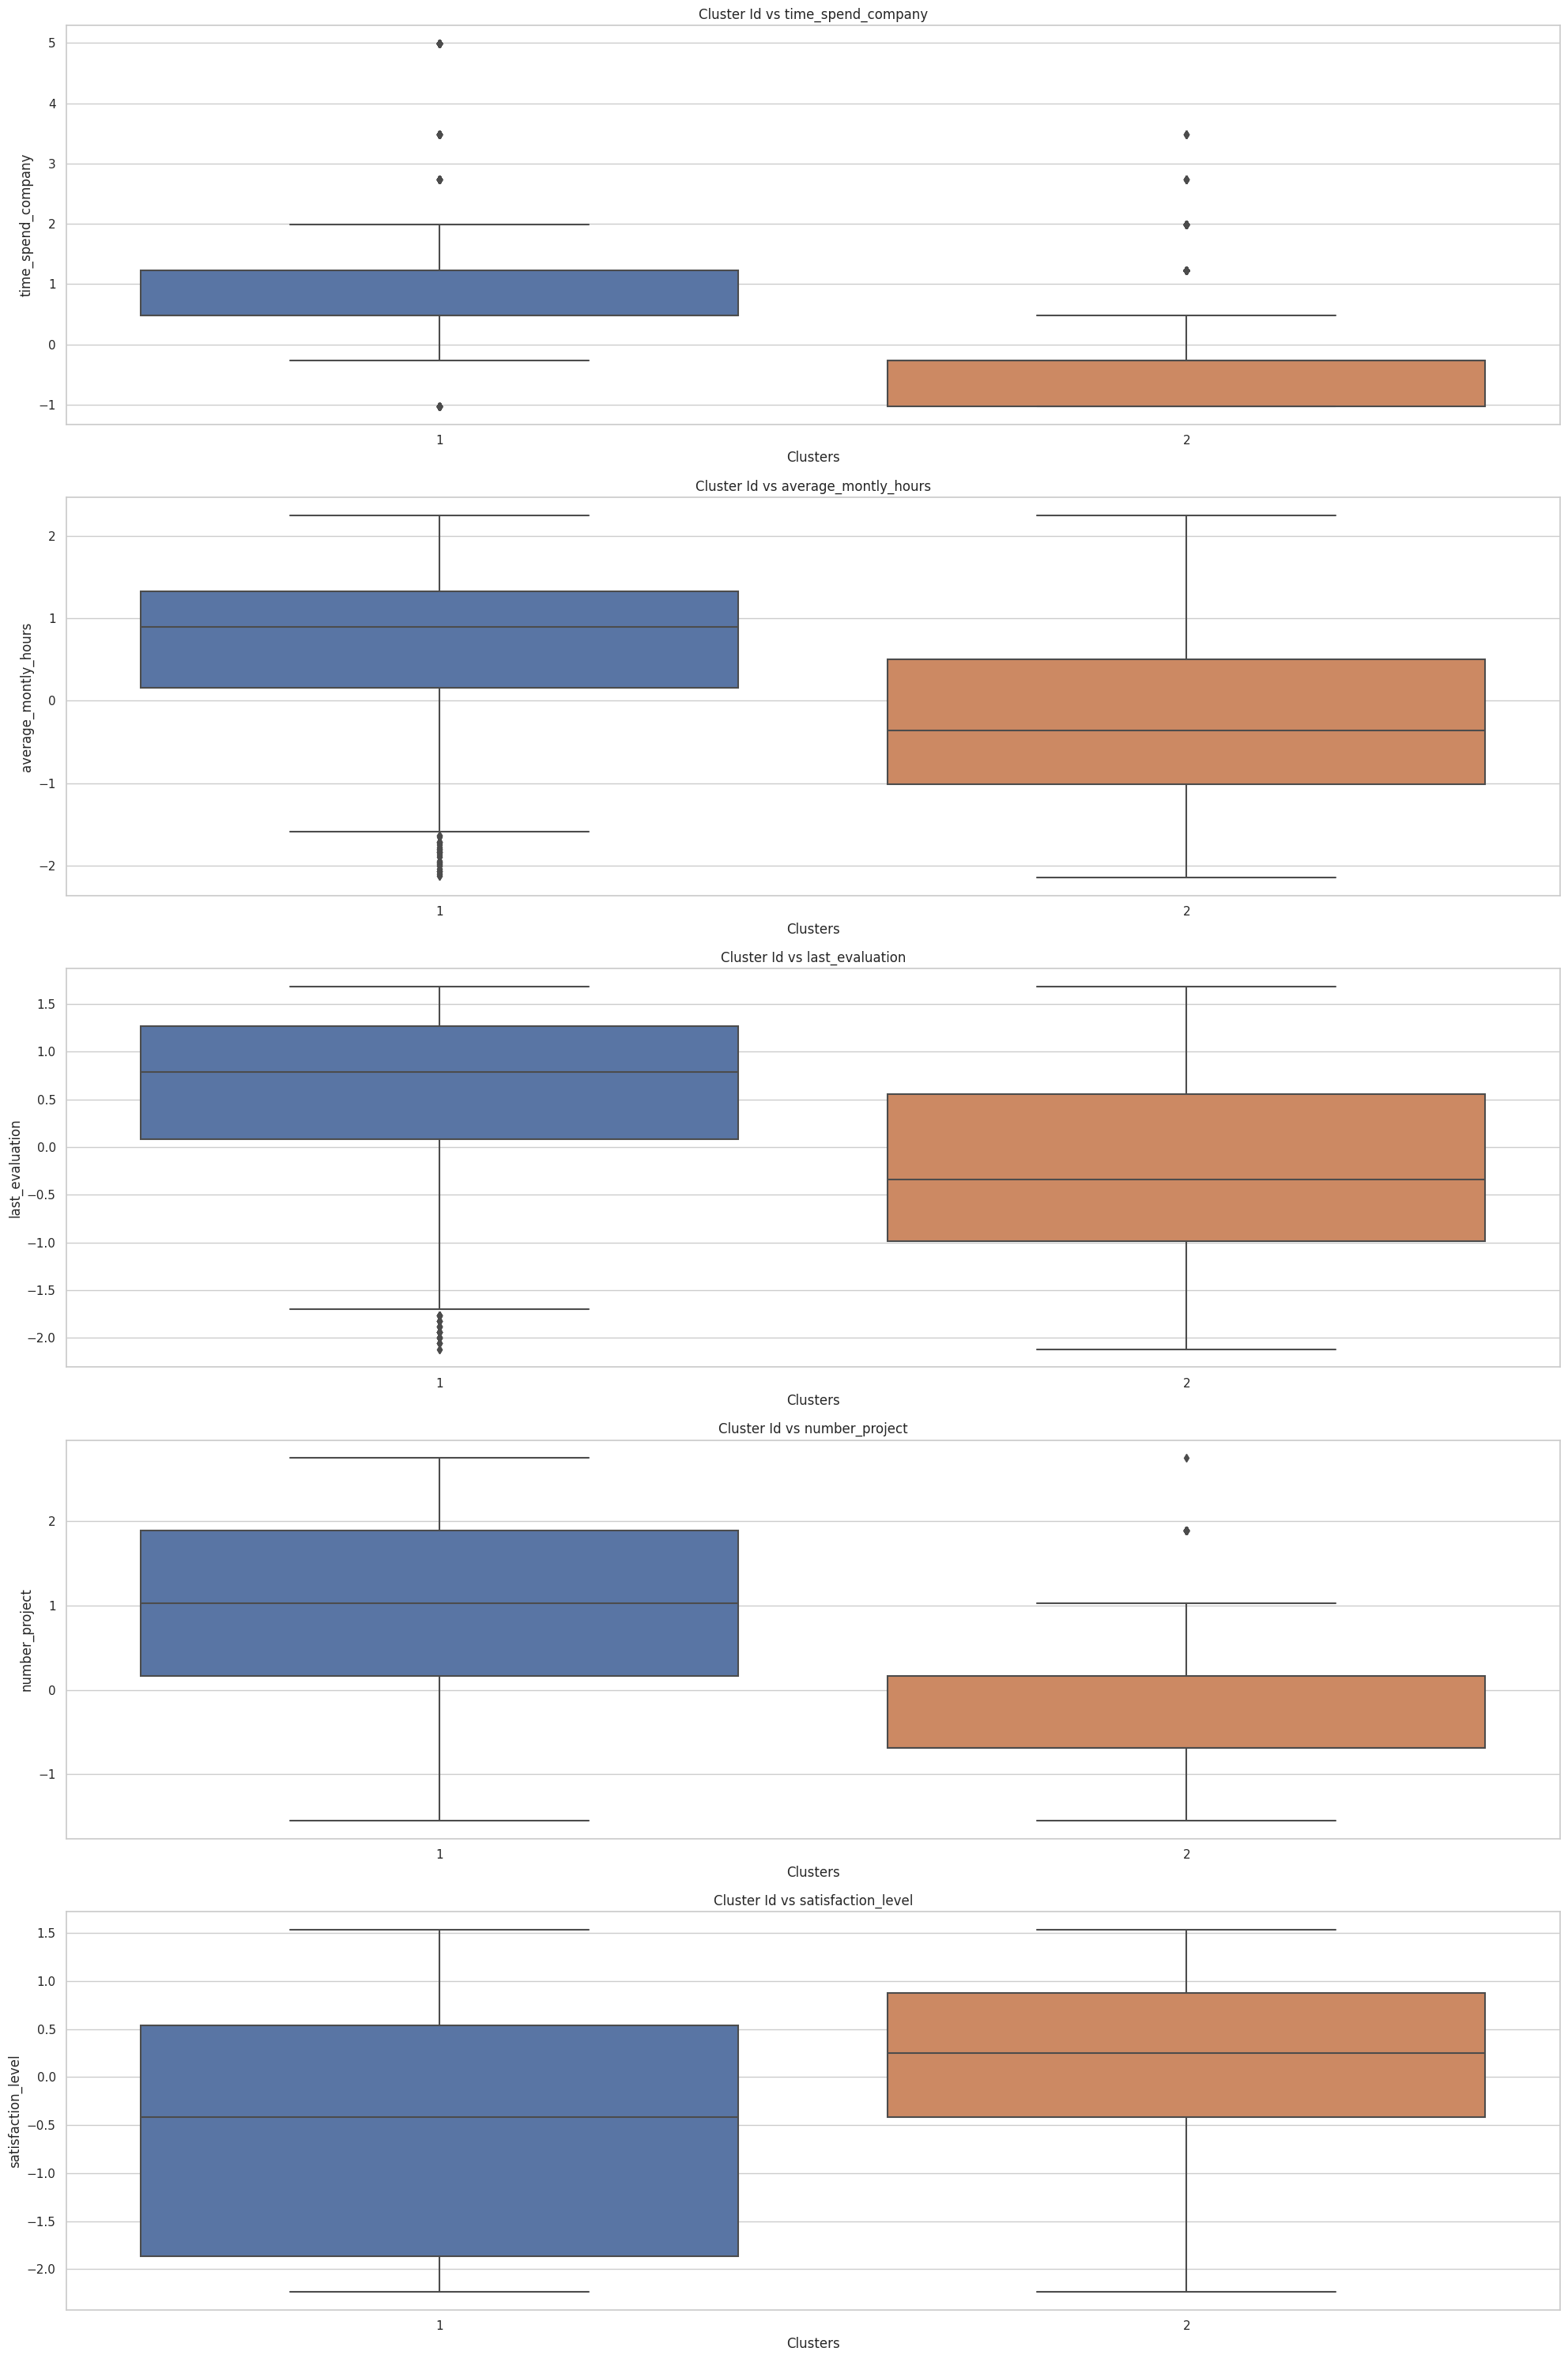

In [75]:
plt.figure(figsize=(20, 30))

# Loop through each feature
for i, feature in enumerate(features, 1):
    plt.subplot(len(features), 1, i)
    sns.boxplot(x='Clusters', y=feature, data=df_cluster_2)
    plt.title(f'Cluster Id vs {feature}')

# Adjust layout for better visualization
plt.tight_layout()
plt.show()


* **Cluster orange** This cluster has a high number of projects, the highest evaluation, a high monthly average, and the longest tenure in the company. However, the satisfaction level within this cluster is low to average. It is likely that employees in this cluster will stay with the company. Therefore, we can name this cluster the "LIKELY TO LEAVE" cluster. By focusing on their development, providing ongoing support, and creating opportunities for growth, we can foster an environment that encourages their continued commitment to the company.

* **Cluster blue** This cluster has the low number of projects, average evaluation score, a high monthly average, and the shortest tenure in the company, However, the satisfaction level within this cluster is high. It is likely that employees in this cluster will stay in the company. Therefore, we can name this cluster "ENTRY_LEVEL EMPLOYEE" employees.

## 5. Predictive Model Building

### Preprocessing

In [76]:
X = df.drop("left", axis=1)
y = df.left
print(y)
display(X)

0        1
1        1
2        1
3        1
4        1
        ..
11995    0
11996    0
11997    0
11998    0
11999    0
Name: left, Length: 11991, dtype: int64


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,0,sales,low
1,0.80,0.86,5,262,6,0,0,sales,medium
2,0.11,0.88,7,272,4,0,0,sales,medium
3,0.72,0.87,5,223,5,0,0,sales,low
4,0.37,0.52,2,159,3,0,0,sales,low
...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,1,management,high
11996,0.74,0.95,5,266,10,0,1,management,high
11997,0.85,0.54,3,185,10,0,1,management,high
11998,0.33,0.65,3,172,10,0,1,marketing,high


In [77]:
from sklearn.model_selection import train_test_split

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
from sklearn.pipeline import Pipeline
operations = [("Encoder", column_trans)]


pipe = Pipeline(steps=operations).set_output(transform="pandas")
X_train_transformed = pipe.fit_transform(X_train)
X_test_transformed = pipe.transform(X_test)

## Choose the best ML model using LazyPredcit

# Lazy Predcit

In [80]:
!pip install lazypredict

In [81]:
from lazypredict.Supervised import LazyClassifier

In [82]:
clf = LazyClassifier(verbose=1, ignore_warnings=True, custom_metric=None)

models,predictions = clf.fit(X_train_transformed, X_test_transformed, y_train, y_test)
models

  3%|▎         | 1/29 [00:00<00:10,  2.62it/s]

{'Model': 'AdaBoostClassifier', 'Accuracy': 0.9629012088370155, 'Balanced Accuracy': 0.9149398775333937, 'ROC AUC': 0.9149398775333938, 'F1 Score': 0.9621742264689599, 'Time taken': 0.38060808181762695}


  7%|▋         | 2/29 [00:00<00:08,  3.22it/s]

{'Model': 'BaggingClassifier', 'Accuracy': 0.9799916631929971, 'Balanced Accuracy': 0.9511125839056014, 'ROC AUC': 0.9511125839056013, 'F1 Score': 0.9797211433855137, 'Time taken': 0.2591845989227295}
{'Model': 'BernoulliNB', 'Accuracy': 0.8270112546894539, 'Balanced Accuracy': 0.547324756177624, 'ROC AUC': 0.547324756177624, 'F1 Score': 0.7850888141986263, 'Time taken': 0.033542633056640625}


 21%|██        | 6/29 [00:04<00:17,  1.30it/s]

{'Model': 'CalibratedClassifierCV', 'Accuracy': 0.8357649020425177, 'Balanced Accuracy': 0.575502559916525, 'ROC AUC': 0.5755025599165251, 'F1 Score': 0.8013892994654606, 'Time taken': 4.114099025726318}
{'Model': 'DecisionTreeClassifier', 'Accuracy': 0.9620675281367236, 'Balanced Accuracy': 0.9363652929737718, 'ROC AUC': 0.9363652929737718, 'F1 Score': 0.9622351910708123, 'Time taken': 0.0815114974975586}
{'Model': 'DummyClassifier', 'Accuracy': 0.8328470195914964, 'Balanced Accuracy': 0.5, 'ROC AUC': 0.5, 'F1 Score': 0.756892583645126, 'Time taken': 0.023288726806640625}
{'Model': 'ExtraTreeClassifier', 'Accuracy': 0.9420591913297207, 'Balanced Accuracy': 0.9054172626491828, 'ROC AUC': 0.905417262649183, 'F1 Score': 0.9425912339259133, 'Time taken': 0.028537273406982422}


 31%|███       | 9/29 [00:05<00:10,  1.90it/s]

{'Model': 'ExtraTreesClassifier', 'Accuracy': 0.9758232596915382, 'Balanced Accuracy': 0.9406370210609611, 'ROC AUC': 0.9406370210609613, 'F1 Score': 0.9754169205851531, 'Time taken': 0.7964863777160645}
{'Model': 'GaussianNB', 'Accuracy': 0.8370154230929554, 'Balanced Accuracy': 0.7785697168490187, 'ROC AUC': 0.7785697168490187, 'F1 Score': 0.8463225607180497, 'Time taken': 0.038027048110961914}


 38%|███▊      | 11/29 [00:06<00:09,  1.94it/s]

{'Model': 'KNeighborsClassifier', 'Accuracy': 0.9512296790329304, 'Balanced Accuracy': 0.9198924610395932, 'ROC AUC': 0.9198924610395932, 'F1 Score': 0.9515855062121998, 'Time taken': 0.949174165725708}


 41%|████▏     | 12/29 [00:18<00:44,  2.60s/it]

{'Model': 'LabelPropagation', 'Accuracy': 0.9499791579824927, 'Balanced Accuracy': 0.9201383428316097, 'ROC AUC': 0.9201383428316097, 'F1 Score': 0.9504618770943758, 'Time taken': 11.585007429122925}


 45%|████▍     | 13/29 [00:38<01:39,  6.24s/it]

{'Model': 'LabelSpreading', 'Accuracy': 0.9503959983326385, 'Balanced Accuracy': 0.9203885930818598, 'ROC AUC': 0.92038859308186, 'F1 Score': 0.9508514880372927, 'Time taken': 19.804403066635132}


 48%|████▊     | 14/29 [00:38<01:12,  4.84s/it]

{'Model': 'LinearDiscriminantAnalysis', 'Accuracy': 0.8345143809920801, 'Balanced Accuracy': 0.5946844600211184, 'ROC AUC': 0.5946844600211184, 'F1 Score': 0.8080836027963695, 'Time taken': 0.20581674575805664}


 55%|█████▌    | 16/29 [00:40<00:39,  3.06s/it]

{'Model': 'LinearSVC', 'Accuracy': 0.8357649020425177, 'Balanced Accuracy': 0.5535766439756464, 'ROC AUC': 0.5535766439756464, 'F1 Score': 0.7914424400783725, 'Time taken': 1.902217149734497}
{'Model': 'LogisticRegression', 'Accuracy': 0.830762817840767, 'Balanced Accuracy': 0.5615365989430827, 'ROC AUC': 0.5615365989430827, 'F1 Score': 0.7931728993231968, 'Time taken': 0.10958433151245117}


 59%|█████▊    | 17/29 [00:40<00:27,  2.26s/it]

{'Model': 'NearestCentroid', 'Accuracy': 0.7603167986661109, 'Balanced Accuracy': 0.7115943874048611, 'ROC AUC': 0.7115943874048613, 'F1 Score': 0.7825343295906746, 'Time taken': 0.11847424507141113}
{'Model': 'PassiveAggressiveClassifier', 'Accuracy': 0.6777824093372239, 'Balanced Accuracy': 0.562381583578591, 'ROC AUC': 0.562381583578591, 'F1 Score': 0.7075248332529568, 'Time taken': 0.07086849212646484}


 72%|███████▏  | 21/29 [00:40<00:07,  1.13it/s]

{'Model': 'Perceptron', 'Accuracy': 0.7982492705293872, 'Balanced Accuracy': 0.6795523703254376, 'ROC AUC': 0.6795523703254377, 'F1 Score': 0.8056470394218496, 'Time taken': 0.1269998550415039}
{'Model': 'QuadraticDiscriminantAnalysis', 'Accuracy': 0.924968736973739, 'Balanced Accuracy': 0.8911704722178537, 'ROC AUC': 0.8911704722178537, 'F1 Score': 0.9267584331391207, 'Time taken': 0.11845135688781738}


 79%|███████▉  | 23/29 [00:44<00:06,  1.11s/it]

{'Model': 'RandomForestClassifier', 'Accuracy': 0.9795748228428511, 'Balanced Accuracy': 0.9478724360270495, 'ROC AUC': 0.9478724360270495, 'F1 Score': 0.9792428168532011, 'Time taken': 3.2614283561706543}
{'Model': 'RidgeClassifier', 'Accuracy': 0.8403501458941226, 'Balanced Accuracy': 0.5433731736724255, 'ROC AUC': 0.5433731736724255, 'F1 Score': 0.7875802387266173, 'Time taken': 0.10885977745056152}


 83%|████████▎ | 24/29 [00:44<00:04,  1.12it/s]

{'Model': 'RidgeClassifierCV', 'Accuracy': 0.8403501458941226, 'Balanced Accuracy': 0.5433731736724255, 'ROC AUC': 0.5433731736724255, 'F1 Score': 0.7875802387266173, 'Time taken': 0.2711014747619629}


 86%|████████▌ | 25/29 [00:45<00:03,  1.25it/s]

{'Model': 'SGDClassifier', 'Accuracy': 0.8328470195914964, 'Balanced Accuracy': 0.5, 'ROC AUC': 0.5, 'F1 Score': 0.756892583645126, 'Time taken': 0.5287094116210938}


 97%|█████████▋| 28/29 [00:48<00:00,  1.07it/s]

{'Model': 'SVC', 'Accuracy': 0.9566486035848271, 'Balanced Accuracy': 0.9171659190362432, 'ROC AUC': 0.9171659190362431, 'F1 Score': 0.9564290286100442, 'Time taken': 3.687511444091797}
{'Model': 'XGBClassifier', 'Accuracy': 0.9791579824927052, 'Balanced Accuracy': 0.9486188183195664, 'ROC AUC': 0.9486188183195664, 'F1 Score': 0.978853507085272, 'Time taken': 0.18051648139953613}


100%|██████████| 29/29 [00:49<00:00,  1.70s/it]

[LightGBM] [Info] Number of positive: 1590, number of negative: 8002
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001586 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 431
[LightGBM] [Info] Number of data points in the train set: 9592, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.165763 -> initscore=-1.615957
[LightGBM] [Info] Start training from score -1.615957
{'Model': 'LGBMClassifier', 'Accuracy': 0.9808253438932889, 'Balanced Accuracy': 0.9506164518633347, 'ROC AUC': 0.9506164518633347, 'F1 Score': 0.9805242199281528, 'Time taken': 0.22560477256774902}


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
BaggingClassifier,0.98,0.95,0.95,0.98,0.26
LGBMClassifier,0.98,0.95,0.95,0.98,0.23
XGBClassifier,0.98,0.95,0.95,0.98,0.18
RandomForestClassifier,0.98,0.95,0.95,0.98,3.26
ExtraTreesClassifier,0.98,0.94,0.94,0.98,0.80
DecisionTreeClassifier,0.96,0.94,0.94,0.96,0.08
LabelSpreading,0.95,0.92,0.92,0.95,19.80
LabelPropagation,0.95,0.92,0.92,0.95,11.59
KNeighborsClassifier,0.95,0.92,0.92,0.95,0.95


In [83]:
from sklearn.metrics import classification_report, confusion_matrix
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

### Classification Algorithms
 - Try at least 4 ML/DL algorithms.

In [84]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

def evaluate_classification_model(model, X_train, y_train, X_test, y_test):
    # Make predictions on the test and training sets
    y_pred = model.predict(X_test) > 0.5
    y_train_pred = model.predict(X_train) > 0.5
    y_pred_p = model.predict(X_test)

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Plot and display the confusion matrix for the test set with a specific color map
    cm_test = confusion_matrix(y_test, y_pred)
    disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=[0, 1])
    disp_test.plot(cmap='Greens', ax=axes[0])  # Change 'Greens' to your desired color map
    axes[0].set_title('Test Set Confusion Matrix')

    # Plot and display the confusion matrix for the training set with a specific color map
    cm_train = confusion_matrix(y_train, y_train_pred)
    disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=[0, 1])
    disp_train.plot(cmap='Blues', ax=axes[1])  # Change 'Blues' to your desired color map
    axes[1].set_title('Training Set Confusion Matrix')

    plt.show()

    train_report = classification_report(y_train, y_train_pred)
    test_report = classification_report(y_test, y_pred)

    print(f'''
_______________________Train Results_______________________-
{train_report}

_______________________Test Results_______________________
{test_report}
''')
    print('_______________________precision_recall_curve_______________________')
    precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_p)
    plt.plot(recalls, precisions, label='ANN')
    plt.xlabel('Recalls')
    plt.ylabel('Precisions')
    plt.title('Precision-Recall Curve')
    plt.show()

    fpr, tpr, _ = roc_curve(y_test, y_pred_p)
    roc_auc = auc(fpr, tpr)
    print('_______________________Receiver Operating Characteristic________________________________')

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()

## 1. SVC

### Vanilla SVC model

In [85]:
from sklearn.svm import SVC

operations = [("encoder", column_trans), ("SVC", SVC(probability=True))]

SVM_pipe_model = Pipeline(steps=operations)

SVM_pipe_model.fit(X_train, y_train)

eval_metric(SVM_pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[1963   35]
 [  45  356]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1998
           1       0.91      0.89      0.90       401

    accuracy                           0.97      2399
   macro avg       0.94      0.94      0.94      2399
weighted avg       0.97      0.97      0.97      2399


Train_Set
[[7886  116]
 [ 144 1446]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      8002
           1       0.93      0.91      0.92      1590

    accuracy                           0.97      9592
   macro avg       0.95      0.95      0.95      9592
weighted avg       0.97      0.97      0.97      9592



## SVC Cross validation

In [86]:
from sklearn.model_selection import cross_validate

In [87]:
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

scoring = {'accuracy': make_scorer(accuracy_score),
            'precision-left': make_scorer(precision_score, average=None, labels=[1]),
            'recall-left': make_scorer(recall_score, average=None, labels = [1]),
            'f1-left': make_scorer(f1_score, average=None, labels = [1])}

SVC_model = Pipeline(steps=operations)
scores = cross_validate(SVC_model,
                        X_train,
                        y_train,
                        scoring=scoring,
                        cv = 10,
                        return_train_score=True)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.97
train_accuracy         0.97
test_precision-left    0.91
train_precision-left   0.92
test_recall-left       0.90
train_recall-left      0.91
test_f1-left           0.91
train_f1-left          0.92
dtype: float64

In [88]:
#the SVM model with balanced data

operations = [("encoder", column_trans), ("SVC", SVC(class_weight='balanced'))]

SVM_pipe_model_balanced = Pipeline(steps=operations)

SVM_pipe_model_balanced.fit(X_train, y_train)

eval_metric(SVM_pipe_model_balanced, X_train, y_train, X_test, y_test)

Test_Set
[[1935   63]
 [  41  360]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1998
           1       0.85      0.90      0.87       401

    accuracy                           0.96      2399
   macro avg       0.92      0.93      0.92      2399
weighted avg       0.96      0.96      0.96      2399


Train_Set
[[7748  254]
 [ 110 1480]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      8002
           1       0.85      0.93      0.89      1590

    accuracy                           0.96      9592
   macro avg       0.92      0.95      0.93      9592
weighted avg       0.96      0.96      0.96      9592



###  SVC Model GridsearchCV

In [89]:
from sklearn.model_selection import GridSearchCV

In [90]:
param_grid = {"svc__C": [0.5, 1], "svc__gamma": ["scale", "auto", 0.01]}

In [91]:
operations_svc = [
    ("OneHotEncoder", column_trans),
    ("svc", SVC(class_weight="balanced", random_state=101)),
]

model = Pipeline(steps=operations_svc)

svm_model_grid = GridSearchCV(
    model,
    param_grid,
    scoring=make_scorer(recall_score, average=None, labels = [1]),
    cv=10,
    n_jobs=-1,
    return_train_score=True,
)

In [92]:
svm_model_grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=StandardScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['Departments ']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(categories=[['low',
                                                                                                     'medium',
                                                                                                     'high']],
                                                                                        handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['salary'])],
                                                          verbose_feature_names_out=False)),
                                       ('svc',
                                        SVC(class_weight='balanced',
                                            random_state=101))]),
             n_jobs=-1,
             param_grid={'svc__C': [0.5, 1],
                         'svc__gamma': ['scale', 'auto', 0.01]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=[1]))

In [93]:
svm_model_grid.best_estimator_

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Departments ']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['salary'])],
                                   verbose_feature_names_out=False)),
                ('svc',
                 SVC(C=0.5, class_weight='balanced', gamma=0.01,
                     random_state=101))])

In [94]:
pd.DataFrame(svm_model_grid.cv_results_).loc[
    svm_model_grid.best_index_, ["mean_test_score", "mean_train_score"]
]

mean_test_score    0.93
mean_train_score   0.93
Name: 2, dtype: object

In [95]:
eval_metric(svm_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[1821  177]
 [  35  366]]
              precision    recall  f1-score   support

           0       0.98      0.91      0.94      1998
           1       0.67      0.91      0.78       401

    accuracy                           0.91      2399
   macro avg       0.83      0.91      0.86      2399
weighted avg       0.93      0.91      0.92      2399


Train_Set
[[7267  735]
 [ 117 1473]]
              precision    recall  f1-score   support

           0       0.98      0.91      0.94      8002
           1       0.67      0.93      0.78      1590

    accuracy                           0.91      9592
   macro avg       0.83      0.92      0.86      9592
weighted avg       0.93      0.91      0.92      9592



In [96]:
pip install scikit-plot

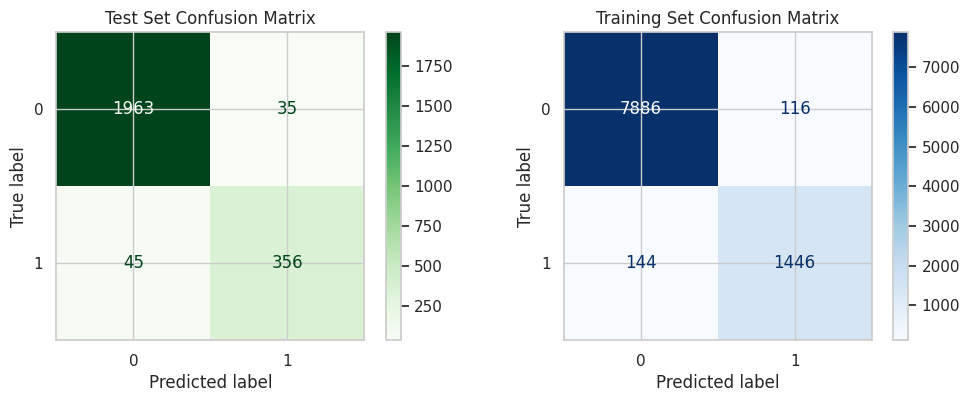


_______________________Train Results_______________________-
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      8002
           1       0.93      0.91      0.92      1590

    accuracy                           0.97      9592
   macro avg       0.95      0.95      0.95      9592
weighted avg       0.97      0.97      0.97      9592


_______________________Test Results_______________________
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1998
           1       0.91      0.89      0.90       401

    accuracy                           0.97      2399
   macro avg       0.94      0.94      0.94      2399
weighted avg       0.97      0.97      0.97      2399


_______________________precision_recall_curve_______________________


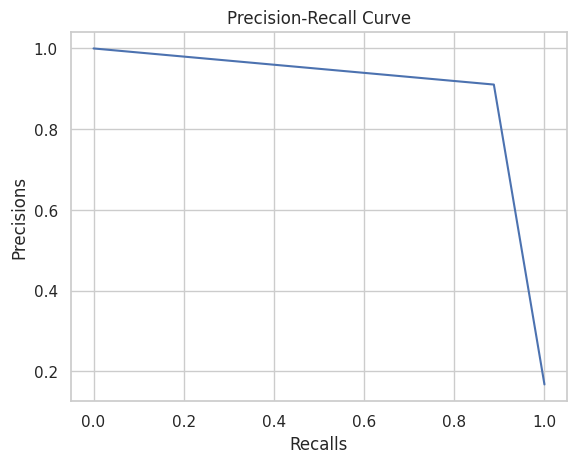

_______________________Receiver Operating Characteristic________________________________


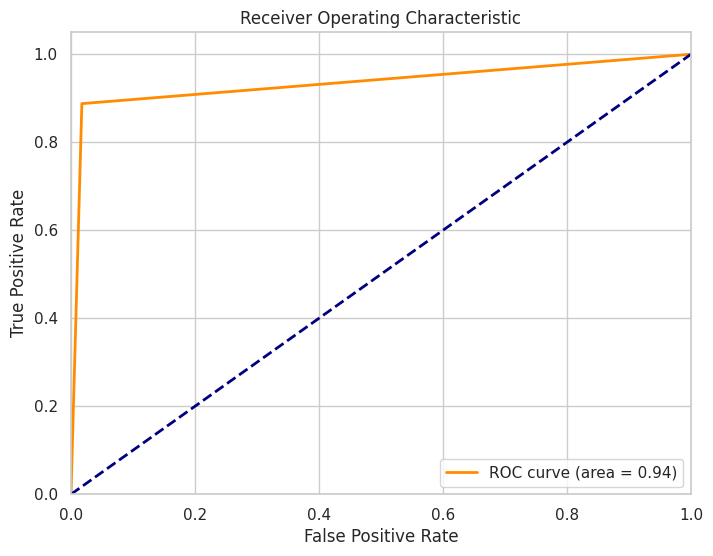

In [97]:
evaluate_classification_model(SVC_model, X_train, y_train, X_test, y_test)

In [99]:
from sklearn.metrics import recall_score, f1_score, average_precision_score

y_pred = svm_model_grid.predict(X_test)
y_test_dummies = pd.get_dummies(y_test)

y_pred = svm_model_grid.predict(X_test)
svc_rec_left = recall_score(y_test, y_pred, labels=[1], average=None)
svc_f1_left = f1_score(y_test, y_pred, labels=[1], average=None)
svc_AP_left = average_precision_score(y_test_dummies[1], y_pred)

## 2. RF

### Vanilla RF Model

In [100]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier


operations = [("encoder", column_trans),
              ("RF_model", RandomForestClassifier())]

RF_model = Pipeline(steps=operations)

RF_model.fit(X_train, y_train)

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Departments ']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['salary'])],
                                   verbose_feature_names_out=False)),
                ('RF_model', RandomForestClassifier())])

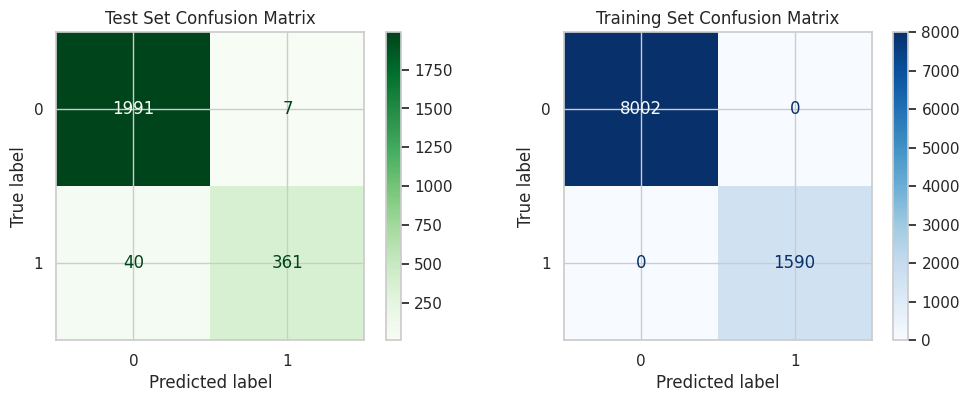


_______________________Train Results_______________________-
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8002
           1       1.00      1.00      1.00      1590

    accuracy                           1.00      9592
   macro avg       1.00      1.00      1.00      9592
weighted avg       1.00      1.00      1.00      9592


_______________________Test Results_______________________
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1998
           1       0.98      0.90      0.94       401

    accuracy                           0.98      2399
   macro avg       0.98      0.95      0.96      2399
weighted avg       0.98      0.98      0.98      2399


_______________________precision_recall_curve_______________________


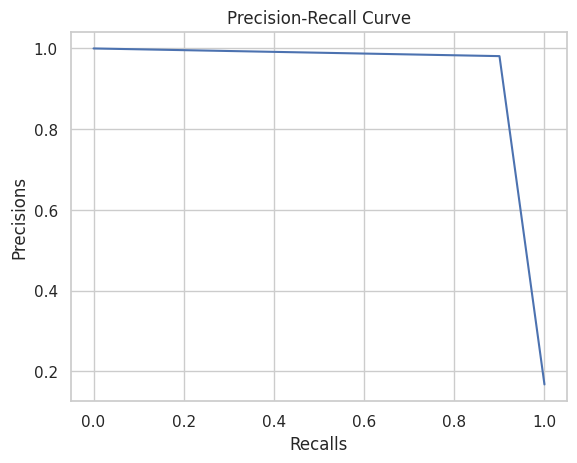

_______________________Receiver Operating Characteristic________________________________


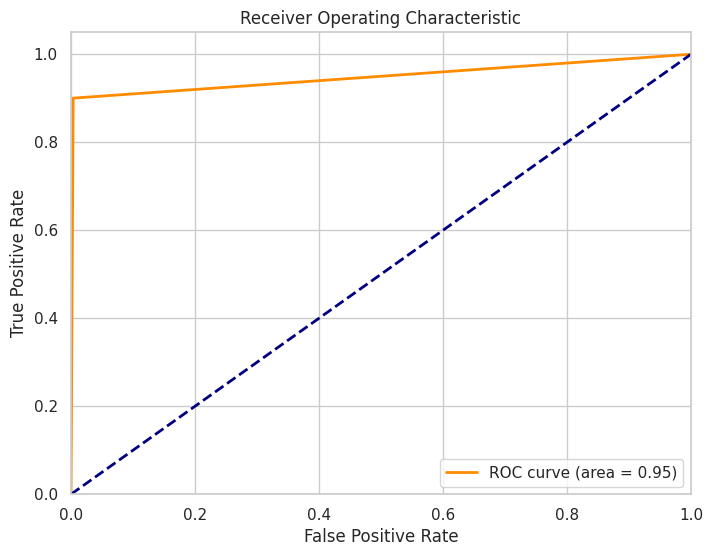

In [101]:
evaluate_classification_model(RF_model, X_train, y_train, X_test, y_test)

## RF cross validation

In [102]:
operations = [("encoder", column_trans),
              ("RF_model", RandomForestClassifier(random_state=101))]

RF_model = Pipeline(steps=operations)

scores = cross_validate(RF_model,
                        X_train,
                        y_train,
                        scoring=scoring,
                        cv = 10,
                        return_train_score=True,
                        n_jobs=-1)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.99
train_accuracy         1.00
test_precision-left    0.99
train_precision-left   1.00
test_recall-left       0.92
train_recall-left      1.00
test_f1-left           0.95
train_f1-left          1.00
dtype: float64

## RF GridSearch

In [103]:
param_grid = {'RF_model__n_estimators':[50, 64, 128, 100],
             'RF_model__max_features':[2, 4, 'sqrt'],
             'RF_model__max_depth':[2, 3, 4],
             'RF_model__min_samples_split':[2, 3,4],
             'RF_model__min_samples_leaf': [2,3,4],
             'RF_model__max_samples':[0.8, 1]
             }

RF_model = RandomForestClassifier(class_weight="balanced", random_state=101)

operations = [("encoder", column_trans),
              ("RF_model", RF_model)]

rg_model = Pipeline(steps=operations)

rf_grid_model = GridSearchCV(estimator=rg_model,
                             param_grid = param_grid,
                             scoring=make_scorer(recall_score, average=None, labels = [1]),
                             n_jobs = -1,
                             verbose=2,
                             cv=10)

In [104]:
rf_grid_model.fit(X_train, y_train)

Fitting 10 folds for each of 648 candidates, totalling 6480 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('encoder',
                                        ColumnTransformer(remainder=StandardScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['Departments ']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(categories=[['low',
                                                                                                     'medium',
                                                                                                     'high']],
                                                                                        handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['salary'])],
                                                          verbose_featu...
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=101))]),
             n_jobs=-1,
             param_grid={'RF_model__max_depth': [2, 3, 4],
                         'RF_model__max_features': [2, 4, 'sqrt'],
                         'RF_model__max_samples': [0.8, 1],
                         'RF_model__min_samples_leaf': [2, 3, 4],
                         'RF_model__min_samples_split': [2, 3, 4],
                         'RF_model__n_estimators': [50, 64, 128, 100]},
             scoring=make_scorer(recall_score, average=None, labels=[1]),
             verbose=2)

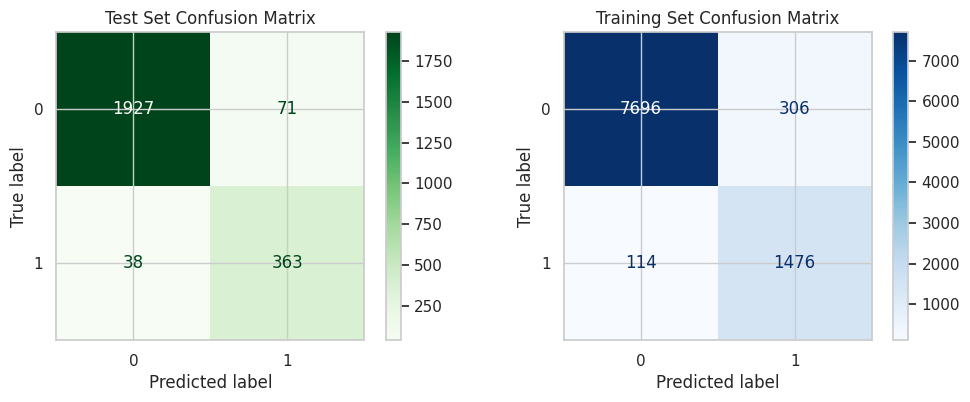


_______________________Train Results_______________________-
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      8002
           1       0.83      0.93      0.88      1590

    accuracy                           0.96      9592
   macro avg       0.91      0.95      0.92      9592
weighted avg       0.96      0.96      0.96      9592


_______________________Test Results_______________________
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1998
           1       0.84      0.91      0.87       401

    accuracy                           0.95      2399
   macro avg       0.91      0.93      0.92      2399
weighted avg       0.96      0.95      0.96      2399


_______________________precision_recall_curve_______________________


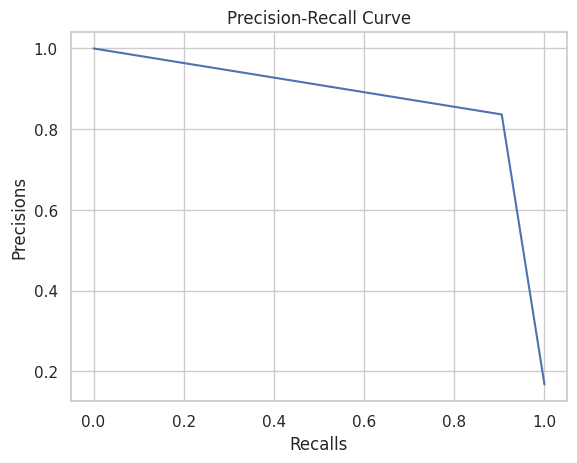

_______________________Receiver Operating Characteristic________________________________


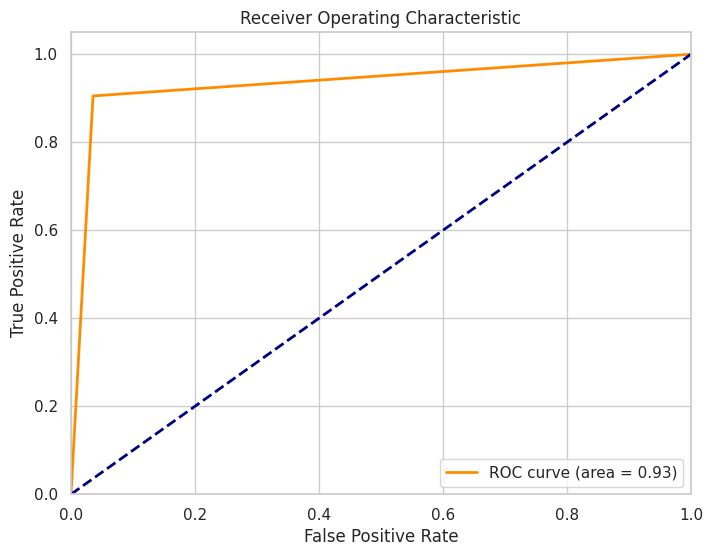

In [105]:
evaluate_classification_model(rf_grid_model, X_train, y_train, X_test, y_test)

In [106]:
y_pred_proba = rf_grid_model.predict_proba(X_test)
y_test_dummies = pd.get_dummies(y_test)

y_pred = rf_grid_model.predict(X_test)
rf_rec_left = recall_score(y_test, y_pred, labels=[1], average=None)
rf_f1_left = f1_score(y_test, y_pred, labels=[1], average=None)
rf_AP_left = average_precision_score(y_test_dummies[1], y_pred_proba[:, 1])

## Deep Learning

In [107]:
import tensorflow as tf

In [108]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation

In [109]:
# First way to create the model using the Sequential API
# Add this to the model:
'''  Input(shape=X_train_transformed.shape[1]),
        Dense(units=64, activation="relu"),
        Dense(units=32, activation="relu"),
        Dense(units=16, activation="relu"),
        Dense(units=1, activation="sigmoid"),'''

model = Sequential()
model.add(Dense(units=64, activation="relu", input_dim=X_train_transformed.shape[1]))
model.add(Dense(32, activation="relu"))
model.add(Dense(16, activation="relu"))
model.add(Dense(1, activation="sigmoid"))


In [110]:
# If input_dim is not provided when the model was created, this will return an error
# because input dimensions are needed to calculate the number of parameters.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1216      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 3841 (15.00 KB)
Trainable params: 3841 (15.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [111]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(18, 64) dtype=float32, numpy=
 array([[ 0.25865895, -0.08522643, -0.07683977, ..., -0.13894555,
         -0.02976739,  0.13553712],
        [ 0.04404175, -0.17537525,  0.00646532, ...,  0.2282503 ,
         -0.17963731,  0.19365752],
        [ 0.12788278,  0.24783158, -0.1503796 , ...,  0.26437026,
         -0.22682726,  0.0532974 ],
        ...,
        [ 0.24305576,  0.2626654 ,  0.18278486, ...,  0.01105857,
          0.13184029, -0.08999205],
        [-0.20425078, -0.10110925, -0.05058536, ...,  0.23330349,
          0.16854945, -0.2690624 ],
        [-0.16602676, -0.24146292, -0.0483187 , ..., -0.23333655,
          0.22552219,  0.23719013]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(64,) dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [112]:
y_train

6426     0
288      1
5051     0
11132    0
3687     0
        ..
11973    0
5200     0
5399     0
861      1
7279     0
Name: left, Length: 9592, dtype: int64

In [113]:
model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['Recall', 'Precision'])

In [114]:
model.fit(x=X_train_transformed, y=y_train, batch_size=32, epochs=250)

Epoch 1/250
300/300 [==============================] - 2s 2ms/step - loss: 0.2267 - recall: 0.6384 - precision: 0.8551
Epoch 2/250
300/300 [==============================] - 1s 2ms/step - loss: 0.1331 - recall: 0.8868 - precision: 0.8913
Epoch 3/250
300/300 [==============================] - 1s 2ms/step - loss: 0.1194 - recall: 0.8899 - precision: 0.9018
Epoch 4/250
300/300 [==============================] - 1s 2ms/step - loss: 0.1102 - recall: 0.8975 - precision: 0.9212
Epoch 5/250
300/300 [==============================] - 1s 3ms/step - loss: 0.1032 - recall: 0.8987 - precision: 0.9261
Epoch 6/250
300/300 [==============================] - 1s 3ms/step - loss: 0.0983 - recall: 0.8969 - precision: 0.9363
Epoch 7/250
300/300 [==============================] - 1s 3ms/step - loss: 0.0948 - recall: 0.9031 - precision: 0.9361
Epoch 8/250
300/300 [==============================] - 1s 3ms/step - loss: 0.0906 - recall: 0.9025 - precision: 0.9428
Epoch 9/250
300/300 [===========================

75/75 [==============================] - 0s 1ms/step


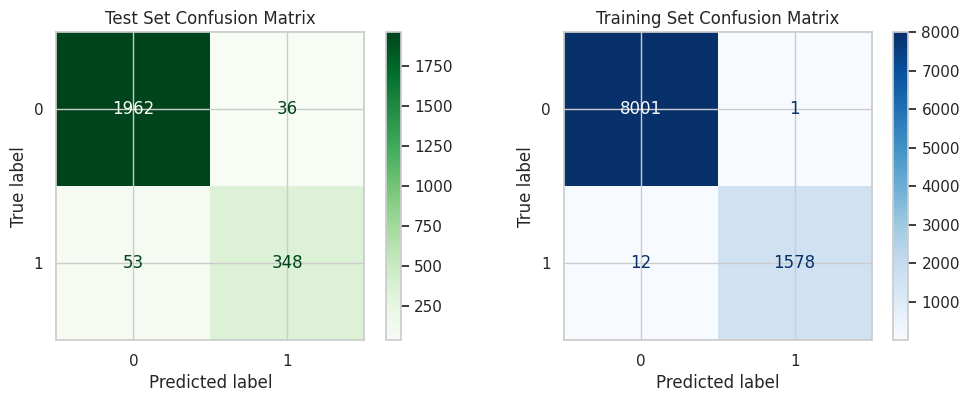


_______________________Train Results_______________________-
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8002
           1       1.00      0.99      1.00      1590

    accuracy                           1.00      9592
   macro avg       1.00      1.00      1.00      9592
weighted avg       1.00      1.00      1.00      9592


_______________________Test Results_______________________
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1998
           1       0.91      0.87      0.89       401

    accuracy                           0.96      2399
   macro avg       0.94      0.92      0.93      2399
weighted avg       0.96      0.96      0.96      2399


_______________________precision_recall_curve_______________________


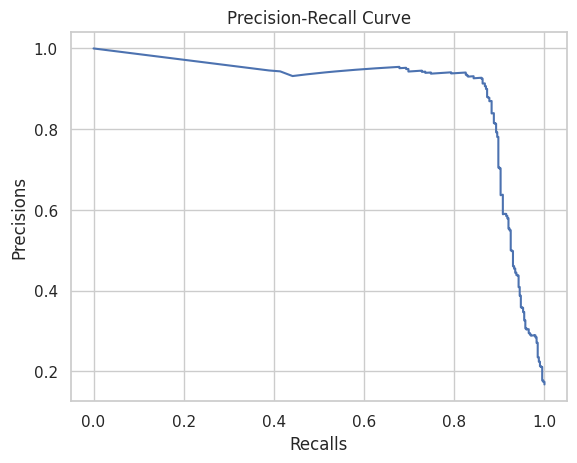

_______________________Receiver Operating Characteristic________________________________


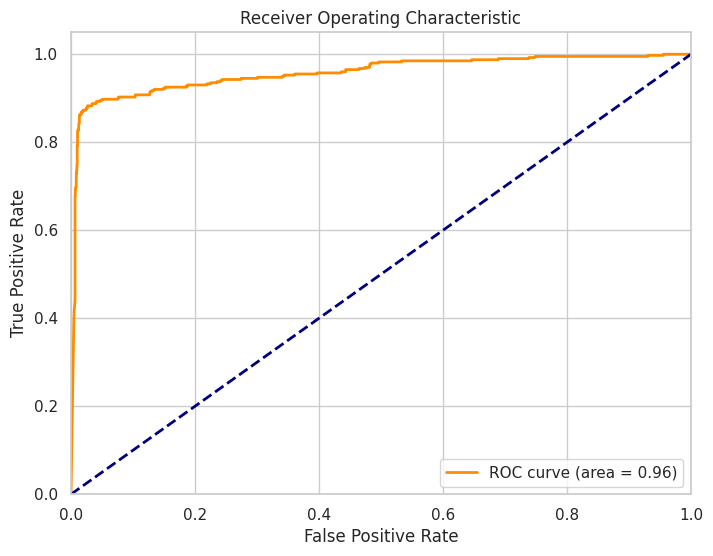

In [115]:
evaluate_classification_model(model, X_train_transformed, y_train, X_test_transformed, y_test)

In [116]:
y_pred = model.predict(X_test_transformed)

DL_AP = average_precision_score(y_test, y_pred)
DL_f1 = f1_score(y_test, y_pred > 0.5)  # Use probabilities and apply a threshold for binary predictions
DL_rec = recall_score(y_test, y_pred > 0.5)

75/75 [==============================] - 0s 1ms/step


**The Deep Learning model is overfitted.**

## XGB Boost

In [117]:
from xgboost import XGBClassifier

operations_gb = [
    ("column_trans", column_trans),
    ("XGB_model", XGBClassifier()),
]

XGB_model = Pipeline(steps=operations_gb)

XGB_model.fit(X_train, y_train)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Departments ']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['salary'])],
                                   verbose_feature_names_out=False)),
                ('X...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

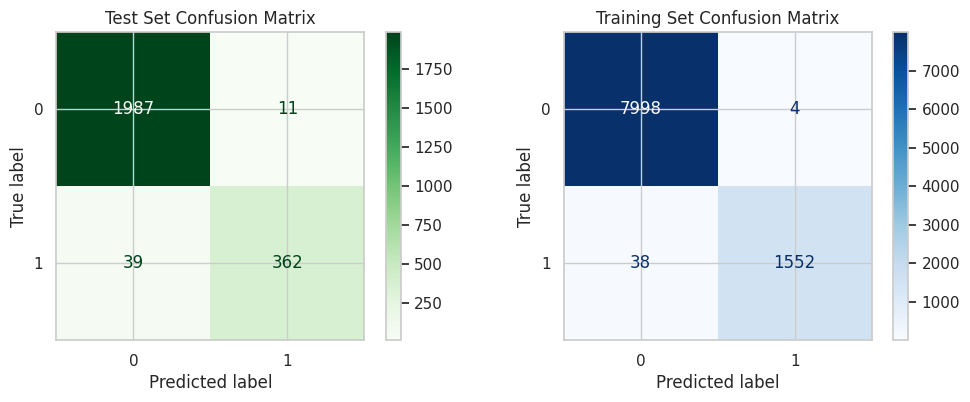


_______________________Train Results_______________________-
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8002
           1       1.00      0.98      0.99      1590

    accuracy                           1.00      9592
   macro avg       1.00      0.99      0.99      9592
weighted avg       1.00      1.00      1.00      9592


_______________________Test Results_______________________
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1998
           1       0.97      0.90      0.94       401

    accuracy                           0.98      2399
   macro avg       0.98      0.95      0.96      2399
weighted avg       0.98      0.98      0.98      2399


_______________________precision_recall_curve_______________________


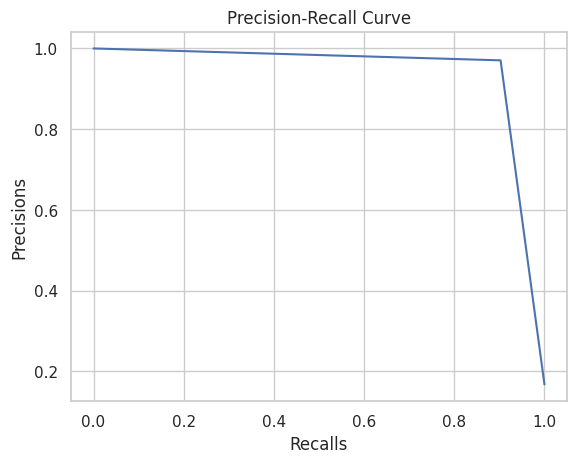

_______________________Receiver Operating Characteristic________________________________


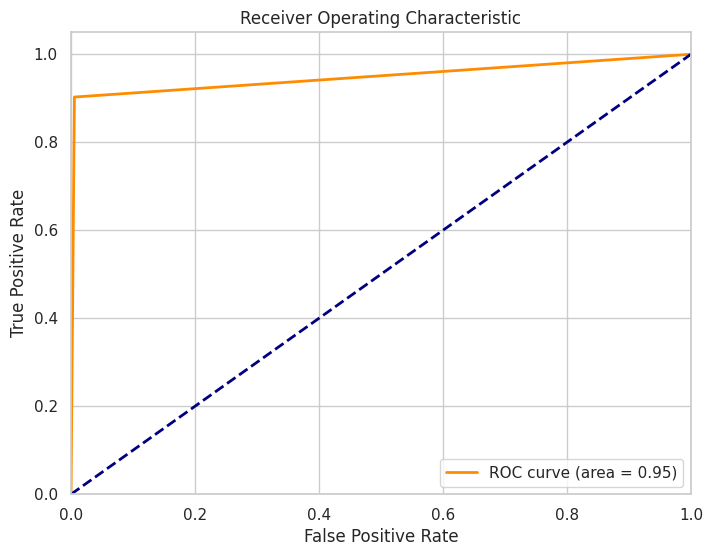

In [118]:
evaluate_classification_model(XGB_model, X_train, y_train, X_test, y_test)

In [119]:
 xgb_classifier = XGBClassifier(gamma=0.5)
 xgb_classifier.fit(X_train_transformed, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

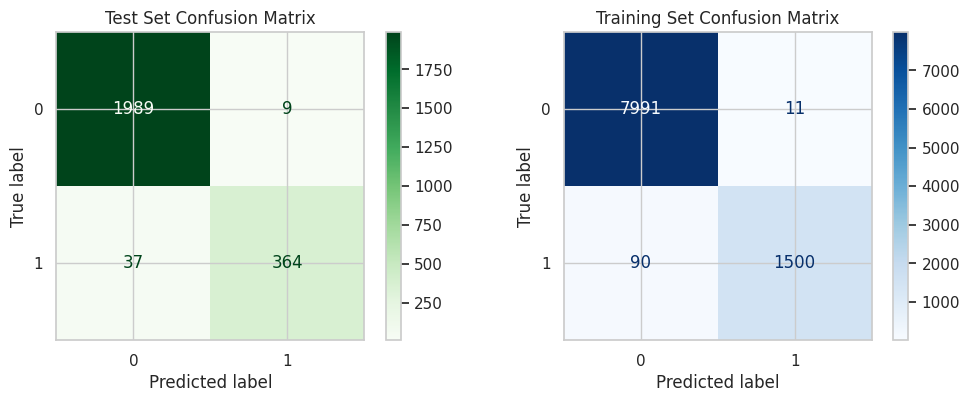


_______________________Train Results_______________________-
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      8002
           1       0.99      0.94      0.97      1590

    accuracy                           0.99      9592
   macro avg       0.99      0.97      0.98      9592
weighted avg       0.99      0.99      0.99      9592


_______________________Test Results_______________________
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1998
           1       0.98      0.91      0.94       401

    accuracy                           0.98      2399
   macro avg       0.98      0.95      0.96      2399
weighted avg       0.98      0.98      0.98      2399


_______________________precision_recall_curve_______________________


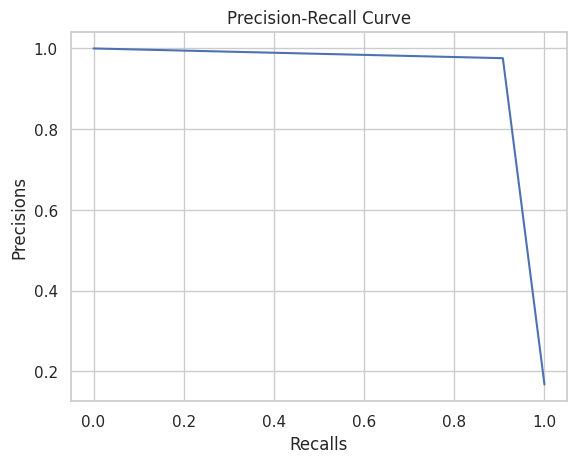

_______________________Receiver Operating Characteristic________________________________


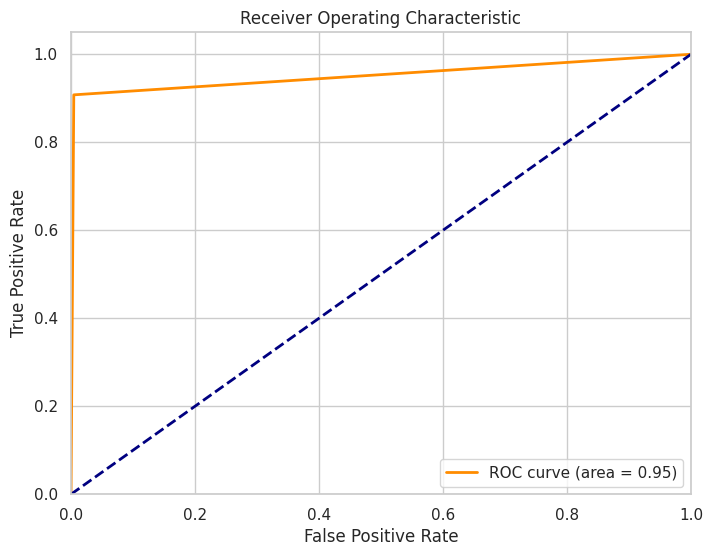

In [120]:
evaluate_classification_model(xgb_classifier, X_train_transformed, y_train, X_test_transformed, y_test)

# XGB Cross Validation

In [121]:
scores = cross_validate(xgb_classifier,
                        X_train_transformed,
                        y_train,
                        scoring=scoring,
                        cv = 10,
                        return_train_score=True,
                        n_jobs=-1)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.98
train_accuracy         0.99
test_precision-left    0.98
train_precision-left   0.99
test_recall-left       0.93
train_recall-left      0.94
test_f1-left           0.95
train_f1-left          0.97
dtype: float64

## XGB GreadSearch

In [122]:
from sklearn.model_selection import GridSearchCV

xgb = XGBClassifier()
param_grid = {"xgboost__n_estimators":[50, 100],
              'xgboost__max_depth':[3,4],
              "xgboost__learning_rate": [0.1, 0.2],
              "xgboost__subsample":[0.5, 0.8, 1],
              "xgboost__colsample_bytree":[0.5,0.7, 1],
             "xgboost__reg_alpha": [0, 0.25, 0.5],
}

pipe_model_gb = Pipeline([("preprocessor", column_trans), ("xgboost", xgb)])

param_grid = param_grid

grid_search = GridSearchCV(
    pipe_model_gb, param_grid,
    cv=5,
    scoring=make_scorer(recall_score, average=None, labels = [1]),
    return_train_score=True,
    verbose=2)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END xgboost__colsample_bytree=0.5, xgboost__learning_rate=0.1, xgboost__max_depth=3, xgboost__n_estimators=50, xgboost__reg_alpha=0, xgboost__subsample=0.5; total time=   0.1s
[CV] END xgboost__colsample_bytree=0.5, xgboost__learning_rate=0.1, xgboost__max_depth=3, xgboost__n_estimators=50, xgboost__reg_alpha=0, xgboost__subsample=0.5; total time=   0.1s
[CV] END xgboost__colsample_bytree=0.5, xgboost__learning_rate=0.1, xgboost__max_depth=3, xgboost__n_estimators=50, xgboost__reg_alpha=0, xgboost__subsample=0.5; total time=   0.1s
[CV] END xgboost__colsample_bytree=0.5, xgboost__learning_rate=0.1, xgboost__max_depth=3, xgboost__n_estimators=50, xgboost__reg_alpha=0, xgboost__subsample=0.5; total time=   0.1s
[CV] END xgboost__colsample_bytree=0.5, xgboost__learning_rate=0.1, xgboost__max_depth=3, xgboost__n_estimators=50, xgboost__reg_alpha=0, xgboost__subsample=0.5; total time=   0.1s
[CV] END xgboost__colsample_byt

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder=StandardScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['Departments ']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(categories=[['low',
                                                                                                     'medium',
                                                                                                     'high']],
                                                                                        handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['salary'])],
                                                          verbose_f...
                                                      num_parallel_tree=None,
                                                      random_state=None, ...))]),
             param_grid={'xgboost__colsample_bytree': [0.5, 0.7, 1],
                         'xgboost__learning_rate': [0.1, 0.2],
                         'xgboost__max_depth': [3, 4],
                         'xgboost__n_estimators': [50, 100],
                         'xgboost__reg_alpha': [0, 0.25, 0.5],
                         'xgboost__subsample': [0.5, 0.8, 1]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=[1]),
             verbose=2)

In [123]:
print(grid_search.best_params_)

{'xgboost__colsample_bytree': 1, 'xgboost__learning_rate': 0.2, 'xgboost__max_depth': 3, 'xgboost__n_estimators': 100, 'xgboost__reg_alpha': 0, 'xgboost__subsample': 1}


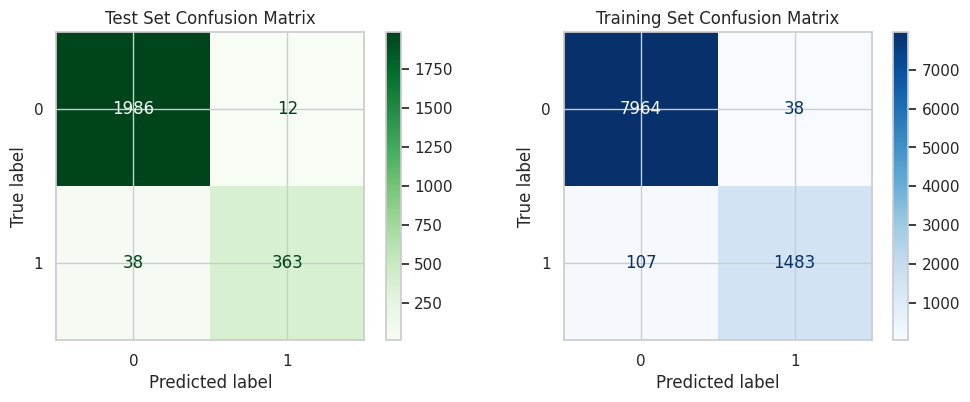


_______________________Train Results_______________________-
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      8002
           1       0.98      0.93      0.95      1590

    accuracy                           0.98      9592
   macro avg       0.98      0.96      0.97      9592
weighted avg       0.98      0.98      0.98      9592


_______________________Test Results_______________________
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1998
           1       0.97      0.91      0.94       401

    accuracy                           0.98      2399
   macro avg       0.97      0.95      0.96      2399
weighted avg       0.98      0.98      0.98      2399


_______________________precision_recall_curve_______________________


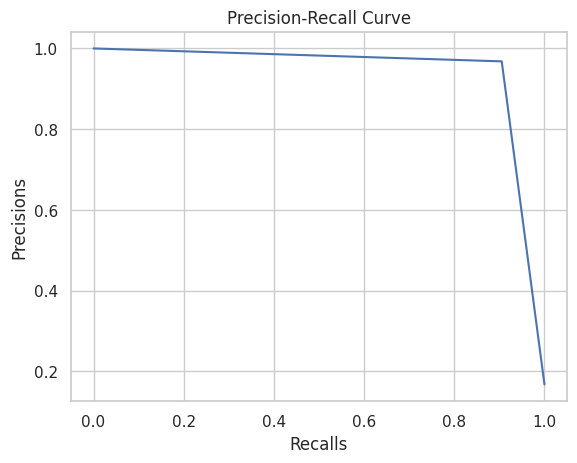

_______________________Receiver Operating Characteristic________________________________


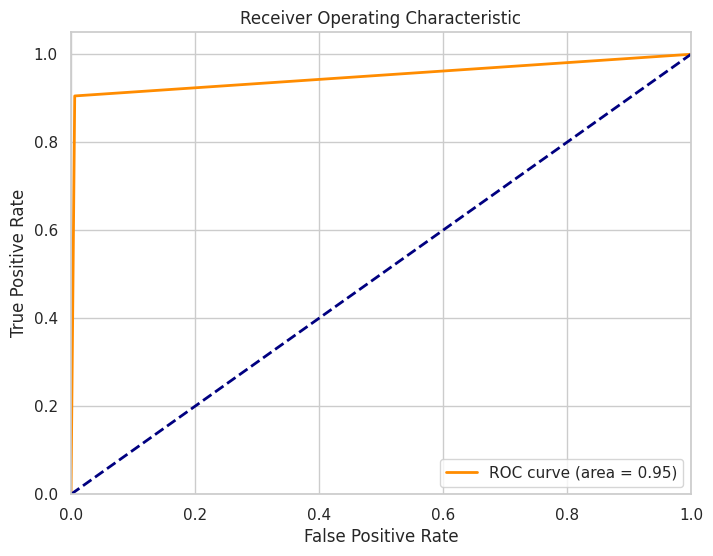

In [124]:
evaluate_classification_model(grid_search, X_train, y_train, X_test, y_test)

In [125]:
from sklearn.metrics import recall_score, f1_score, average_precision_score

y_pred_proba = xgb_classifier.predict_proba(X_test_transformed)
y_test_dummies = pd.get_dummies(y_test)

y_pred = xgb_classifier.predict(X_test_transformed)
xgb_rec_left = recall_score(y_test, y_pred, labels=[1], average=None)
xgb_f1_left = f1_score(y_test, y_pred, labels=[1], average=None)
xgb_AP_left = average_precision_score(y_test_dummies[1], y_pred_proba[:, 1])

## Feature Selection

In [126]:
rf = RandomForestClassifier(random_state=101)

rf.fit(X_train_transformed, y_train)

RandomForestClassifier(random_state=101)

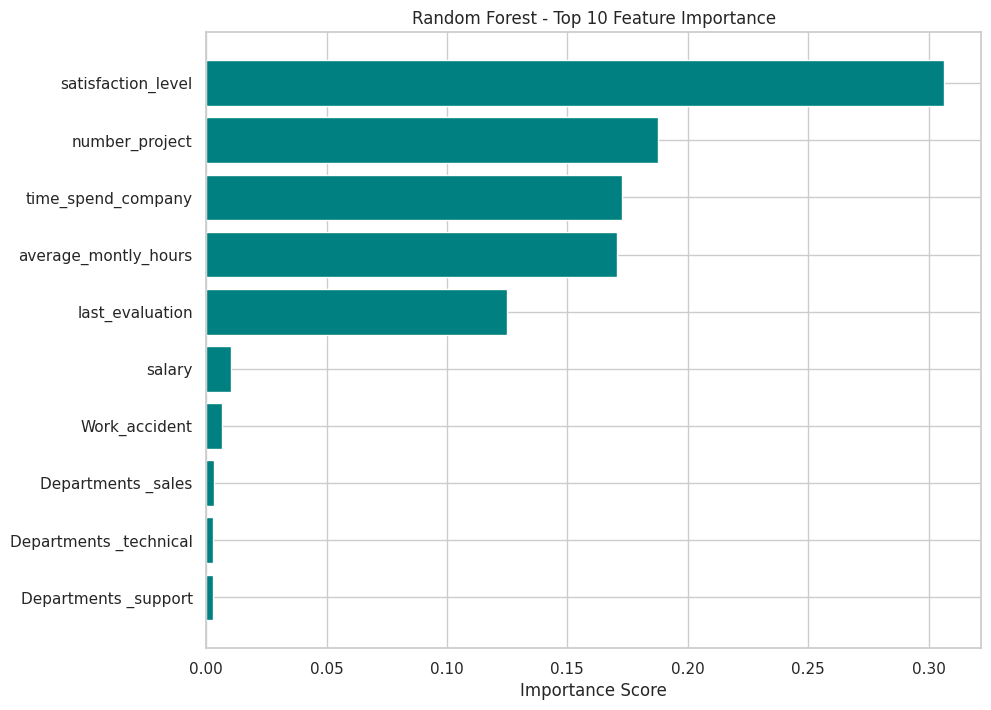

In [127]:

feature_importances = rf.feature_importances_

feature_names = X_train_transformed.columns  # Sort features based on importance

sorted_feature_importance = sorted(zip(feature_names, feature_importances), key=lambda x: x[1], reverse=True)
# Extract feature names and their importance scores
features, importance = zip(*sorted_feature_importance)
# Create a bar plot to visualize feature importance
plt.figure(figsize=(10, 8))
plt.barh(features[:10], importance[:10], color='teal')
plt.title('Random Forest - Top 10 Feature Importance')
plt.xlabel('Importance Score')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most important features at the top
plt.show()

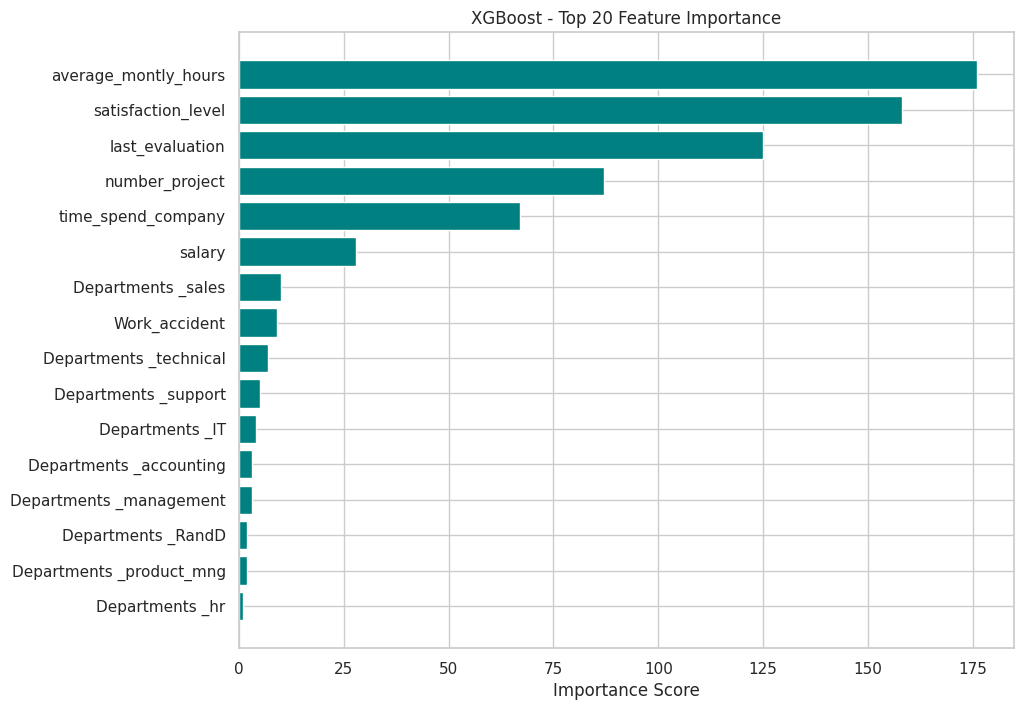

In [128]:
feature_importances = xgb_classifier.get_booster().get_score(importance_type='weight')
sorted_feature_importance = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)

# Extract feature names and their importance scores
features, importance = zip(*sorted_feature_importance)

# Create a bar plot to visualize feature importance
plt.figure(figsize=(10, 8))
plt.barh(features[:20], importance[:20], color='teal')
plt.title('XGBoost - Top 20 Feature Importance')
plt.xlabel('Importance Score')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most important features at the top
plt.show()

In [129]:
features[:6]

('average_montly_hours',
 'satisfaction_level',
 'last_evaluation',
 'number_project',
 'time_spend_company',
 'salary')

## Model comparison

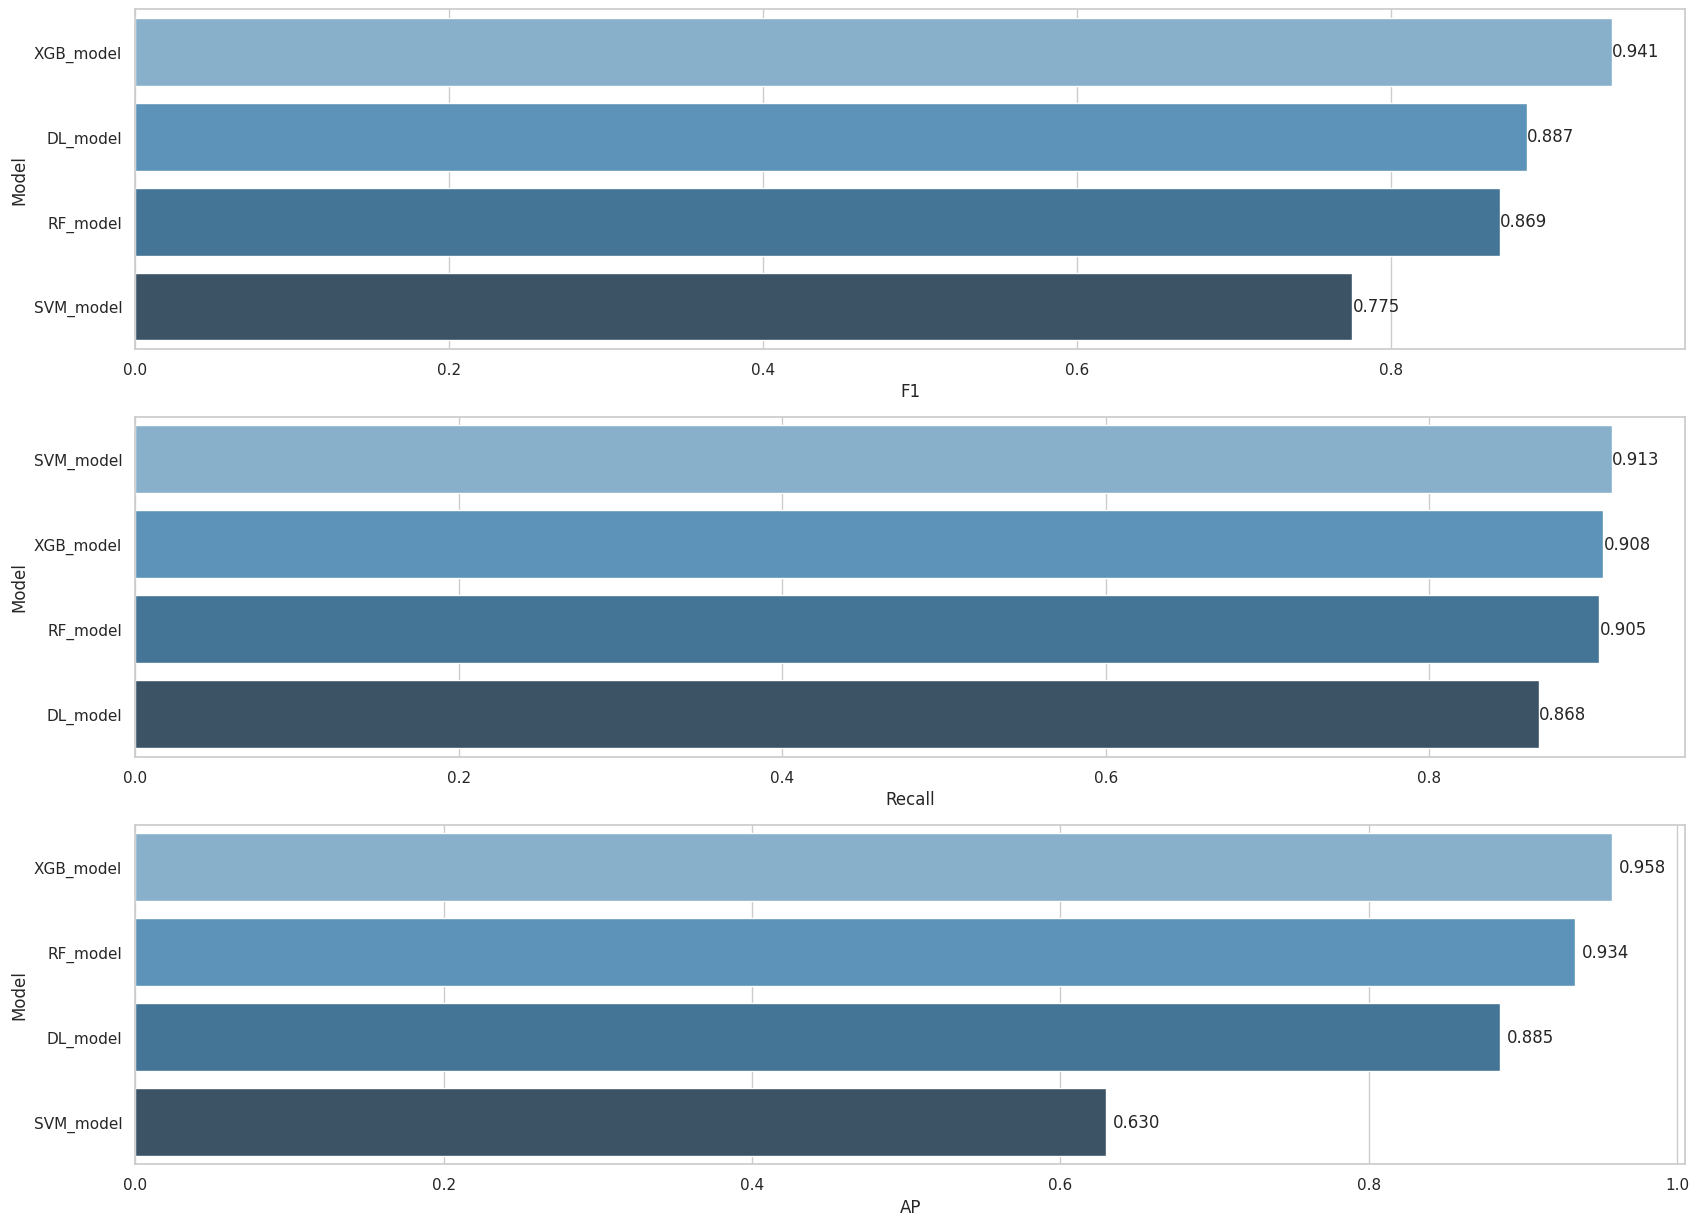

In [130]:

compare = pd.DataFrame(
    {
        "Model": ["RF_model", "XGB_model", "SVM_model", "DL_model"],
        "F1": [rf_f1_left[0], xgb_f1_left[0], svc_f1_left[0], DL_f1],
        "Recall": [rf_rec_left[0], xgb_rec_left[0], svc_rec_left[0], DL_rec],
        "AP": [rf_AP_left, xgb_AP_left, svc_AP_left, DL_AP],
    }
)

plt.figure(figsize=(20, 15))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax = sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax = sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(313)
compare_ap = compare.sort_values(by="AP", ascending=False)
ax = sns.barplot(x="AP", y="Model", data=compare_ap, palette="Blues_d")
for p in ax.patches:
    ax.annotate(format(p.get_width(), '.3f'),
                (p.get_width(), p.get_y() + p.get_height() / 2),
                xytext=(5, 0),
                textcoords='offset points',
                ha='left', va='center')
plt.show()

Conclusion: The XGBoost model is the best model for this dataset. We are going to use gamma as a hyperparameter only.

## 6. Model Deployement

You cooked the food in the kitchen and moved on to the serving stage. The question is how do you showcase your work to others? Model Deployement helps you showcase your work to the world and make better decisions with it. But, deploying a model can get a little tricky at times. Before deploying the model, many things such as data storage, preprocessing, model building and monitoring need to be studied. Streamlit is a popular open source framework used by data scientists for model distribution.

Deployment of machine learning models, means making your models available to your other business systems. By deploying models, other systems can send data to them and get their predictions, which are in turn populated back into the company systems. Through machine learning model deployment, can begin to take full advantage of the model you built.

Data science is concerned with how to build machine learning models, which algorithm is more predictive, how to design features, and what variables to use to make the models more accurate. However, how these models are actually used is often neglected. And yet this is the most important step in the machine learning pipline. Only when a model is fully integrated with the business systems, real values ​​can be extract from its predictions.

After doing the following operations in this notebook, jump to new .py file and create your web app with Streamlit.

### Save and Export the Best Model

In [131]:
X_final = df2[['average_montly_hours',
 'satisfaction_level',
 'last_evaluation',
 'number_project',
 'time_spend_company',
 'salary', 'Departments ']]
y_final = df2.left

In [132]:
X_final.head()

,average_montly_hours,satisfaction_level,last_evaluation,number_project,time_spend_company,salary,Departments
0,157,0.38,0.53,2,3,low,sales
1,262,0.80,0.86,5,6,medium,sales
2,272,0.11,0.88,7,4,medium,sales
3,223,0.72,0.87,5,5,low,sales
4,159,0.37,0.52,2,3,low,sales


In [133]:
y_final

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [134]:
#train test split
X_train, X_test, y_train, y_test  = train_test_split(X_final, y_final, test_size=0.2, random_state=42)

In [135]:
cat_onehot = ["Departments "]

ordinal = ['salary']
ord_for_salary = ['low', 'medium', 'high']

In [136]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

column_trans = make_column_transformer(
                        (OneHotEncoder(handle_unknown="ignore", sparse=False), cat_onehot),
                        (OrdinalEncoder(categories= [ord_for_salary],
                                       handle_unknown="use_encoded_value",
                                        unknown_value=-1) ,ordinal),
                        remainder= StandardScaler(),
                         verbose_feature_names_out=False)

column_trans=column_trans.set_output(transform="pandas")

In [137]:
X_test

,average_montly_hours,satisfaction_level,last_evaluation,number_project,time_spend_company,salary,Departments
6723,226,0.65,0.96,5,2,medium,marketing
6473,166,0.88,0.80,3,2,low,IT
4679,214,0.69,0.98,3,2,low,sales
862,154,0.41,0.47,2,3,low,sales
7286,254,0.87,0.76,5,2,low,hr
...,...,...,...,...,...,...,...
3297,143,0.61,0.74,2,6,medium,sales
14113,255,0.93,0.89,3,7,medium,sales
5514,193,0.78,0.61,3,3,medium,sales
9939,278,0.89,0.76,2,2,medium,sales


In [138]:
from sklearn.pipeline import Pipeline
operations = [("OneHot_Ordinal_Encoder", column_trans)]


pipe = Pipeline(steps=operations).set_output(transform="pandas")
X_train_transformed = pipe.fit_transform(X_train)
X_test_transformed = pipe.transform(X_test)

In [139]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier


operations = [("encoder", column_trans),
              ("RF_model", RandomForestClassifier(random_state=101, max_depth=7))]

RF_model = Pipeline(steps=operations)

RF_model.fit(X_train, y_train)

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Departments ']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['salary'])],
                                   verbose_feature_names_out=False)),
                ('RF_model',
                 RandomForestClassifier(max_depth=7, random_state=101))])

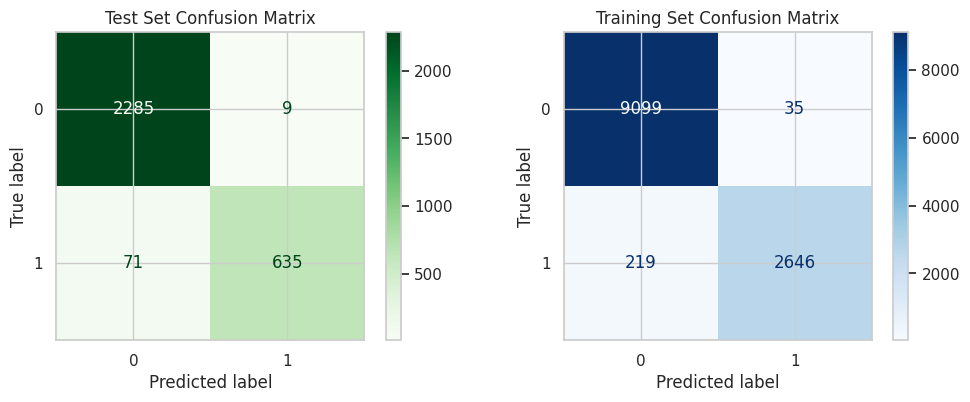


_______________________Train Results_______________________-
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      9134
           1       0.99      0.92      0.95      2865

    accuracy                           0.98     11999
   macro avg       0.98      0.96      0.97     11999
weighted avg       0.98      0.98      0.98     11999


_______________________Test Results_______________________
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2294
           1       0.99      0.90      0.94       706

    accuracy                           0.97      3000
   macro avg       0.98      0.95      0.96      3000
weighted avg       0.97      0.97      0.97      3000


_______________________precision_recall_curve_______________________


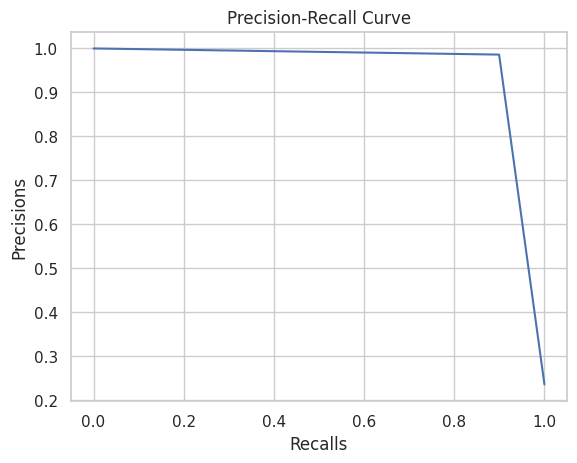

_______________________Receiver Operating Characteristic________________________________


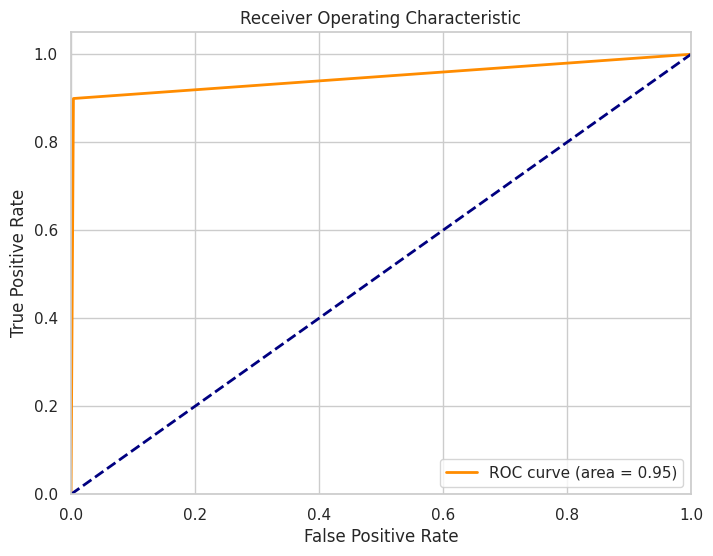

In [140]:
evaluate_classification_model(RF_model, X_train, y_train, X_test, y_test)

In [141]:
operations = [("encoder", column_trans),
              ("RF_model", RandomForestClassifier(random_state=101, max_depth=7))]

RF_model = Pipeline(steps=operations)

scores = cross_validate(RF_model,
                        X_train,
                        y_train,
                        scoring=scoring,
                        cv = 10,
                        return_train_score=True,
                        n_jobs=-1)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.98
train_accuracy         0.98
test_precision-left    0.99
train_precision-left   0.99
test_recall-left       0.92
train_recall-left      0.93
test_f1-left           0.95
train_f1-left          0.96
dtype: float64

In [142]:
operations = [("encoder", column_trans),
              ("RF_model", RandomForestClassifier(random_state=101, max_depth=7))]

RF_model = Pipeline(steps=operations)

RF_model.fit(X_final, y_final)

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Departments ']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['salary'])],
                                   verbose_feature_names_out=False)),
                ('RF_model',
                 RandomForestClassifier(max_depth=7, random_state=101))])

## Save the model

In [143]:
import pickle

In [144]:
filename = 'rf2_model'
pickle.dump(RF_model, open(filename, 'wb'))
final_model = pickle.load(open('rf2_model', 'rb'))

In [145]:
X_final

,average_montly_hours,satisfaction_level,last_evaluation,number_project,time_spend_company,salary,Departments
0,157,0.38,0.53,2,3,low,sales
1,262,0.80,0.86,5,6,medium,sales
2,272,0.11,0.88,7,4,medium,sales
3,223,0.72,0.87,5,5,low,sales
4,159,0.37,0.52,2,3,low,sales
...,...,...,...,...,...,...,...
14994,151,0.40,0.57,2,3,low,support
14995,160,0.37,0.48,2,3,low,support
14996,143,0.37,0.53,2,3,low,support
14997,280,0.11,0.96,6,4,low,support


In [146]:
my_dict = {
    "average_montly_hours": 160,
    "satisfaction_level": 0.70,
    "last_evaluation": 0.85,
    "number_project": 7,
    "time_spend_company": 3,
    'salary':'high',
    "Departments ": 'IT'
}

In [147]:
df = pd.DataFrame.from_dict([my_dict])

In [148]:
df

,average_montly_hours,satisfaction_level,last_evaluation,number_project,time_spend_company,salary,Departments
0,160,0.70,0.85,7,3,high,IT


In [149]:
prediction = final_model.predict(df)
print(prediction)

[0]


SVC model

In [150]:
operations = [("encoder", column_trans),
              ("SVC_model_2" ,SVC(C=0.5, class_weight='balanced', gamma=0.01, random_state=101))]

SVC_model_2 = Pipeline(steps=operations)

SVC_model_2.fit(X_final, y_final)

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Departments ']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['salary'])],
                                   verbose_feature_names_out=False)),
                ('SVC_model_2',
                 SVC(C=0.5, class_weight='balanced', gamma=0.01,
                     random_state=101))])

In [151]:
filename = 'SVC_model_2'
pickle.dump(RF_model, open(filename, 'wb'))
SVC_model_2 = pickle.load(open('SVC_model_2', 'rb'))

In [152]:
prediction = SVC_model_2.predict(df)
print(prediction)

[0]


XGB model

In [154]:
operations = [("encoder", column_trans),
              ("xgb_classifier", XGBClassifier(gamma=0.5))]

xgb_classifier = Pipeline(steps=operations)

xgb_classifier.fit(X_final, y_final)

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Departments ']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['salary'])],
                                   verbose_feature_names_out=False)),
                ('xgb_cl...
                               feature_types=None, gamma=0.5, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [155]:
filename = 'xgb_classifier'
pickle.dump(xgb_classifier, open(filename, 'wb'))
xgb_classifier = pickle.load(open('xgb_classifier', 'rb'))

In [156]:
prediction = xgb_classifier.predict(df)
print(prediction)

[0]


___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___